## Data Preprocessing

<div> <img src="./image/PreProcessing.png" alt="Drawing" style="width: 450px;"/></div>

In [2]:
import os

dir_ = './data'

train = 'application_train.csv'
test = 'application_test.csv'

target = 'TARGET'

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from pprint import pprint

In [4]:
df_train = pd.read_csv(os.path.join(dir_, train))
df_test = pd.read_csv(os.path.join(dir_, test))

In [5]:
num_cols = [col for col in df_test.columns if df_test[col].dtype in ["float16","float32","float64", "int64", "int32"]]
cat_cols = [col for col in df_test.columns if df_test[col].dtype not in ["float16","float32","float64", "int64", "int32"]]

In [6]:
def outlier_replace(data, col_name, q1=0.25, q3=0.75):
    quartile1 = data[col_name].quantile(q1)
    quartile3 = data[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    data.loc[(data[col_name] < low_limit), col_name] = low_limit
    data.loc[(data[col_name] > up_limit), col_name] = up_limit

## Outlier visualization

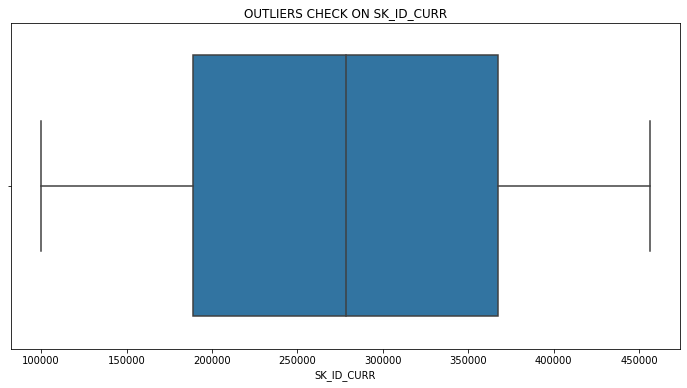

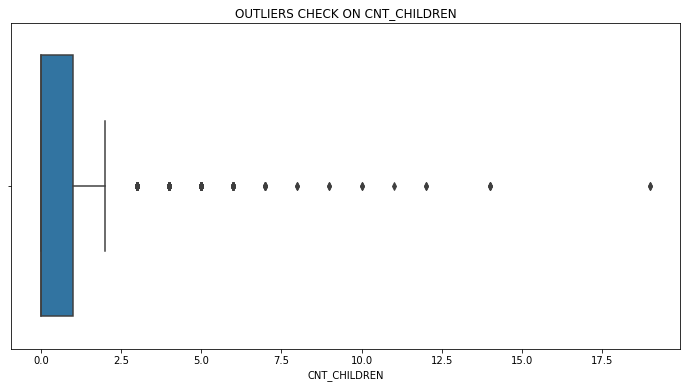

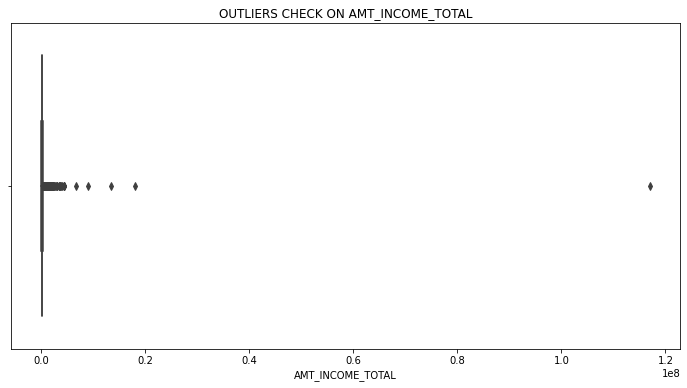

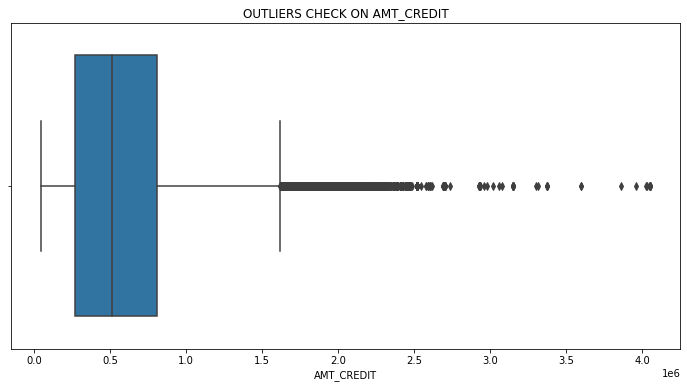

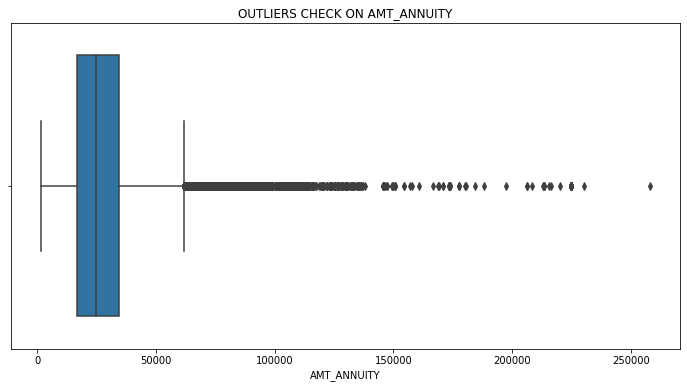

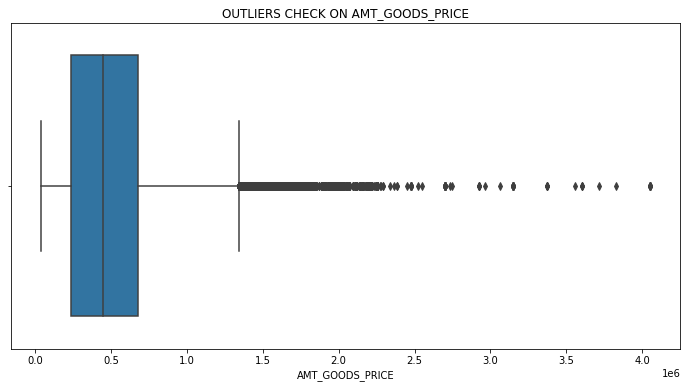

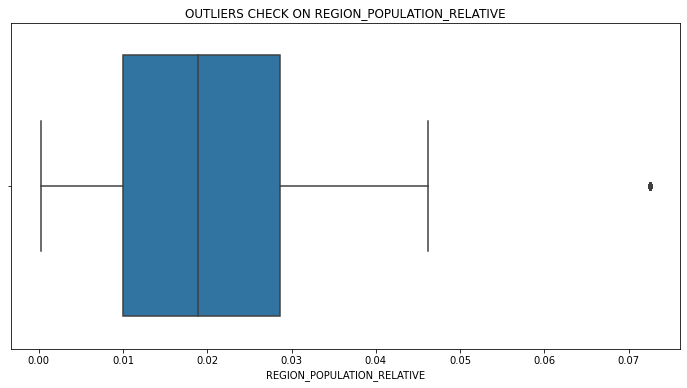

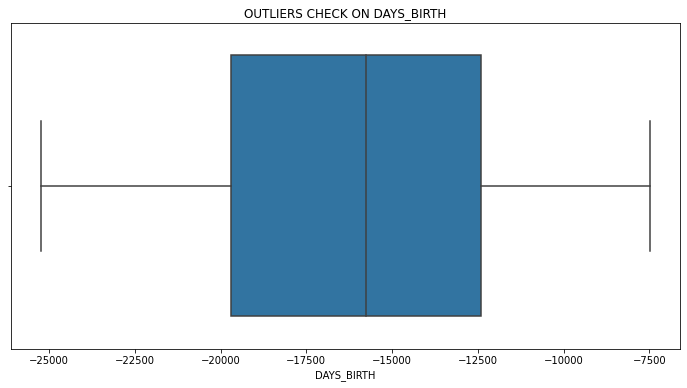

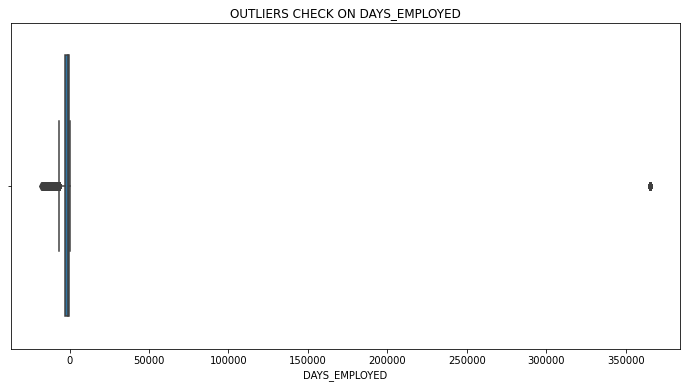

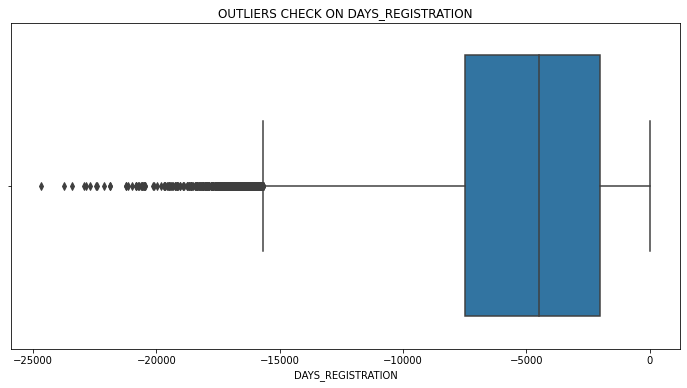

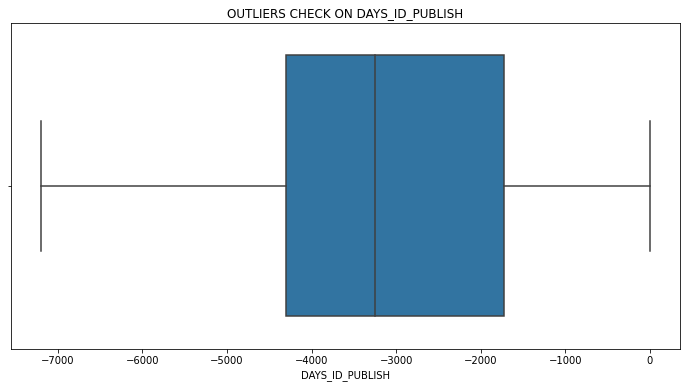

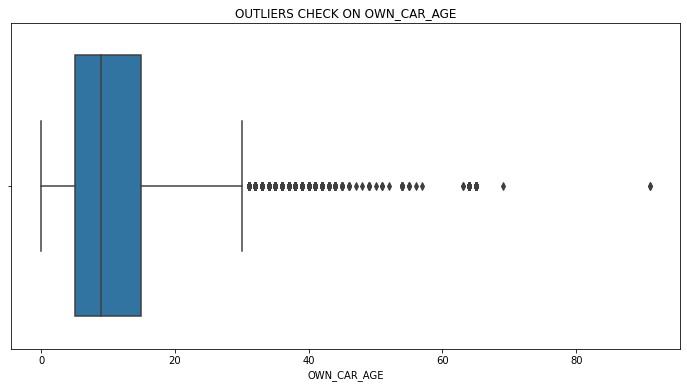

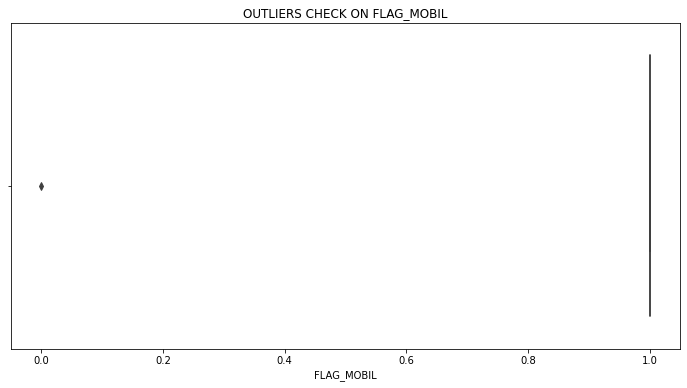

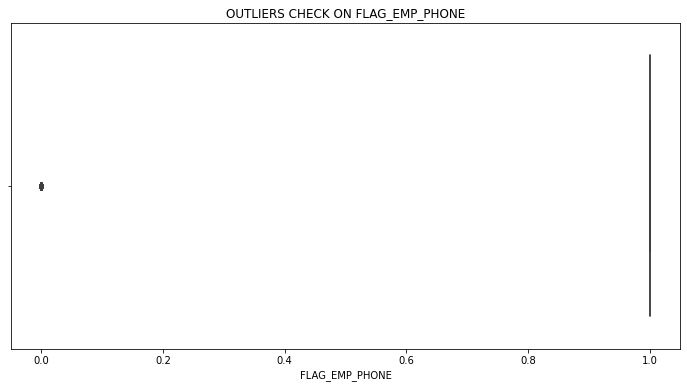

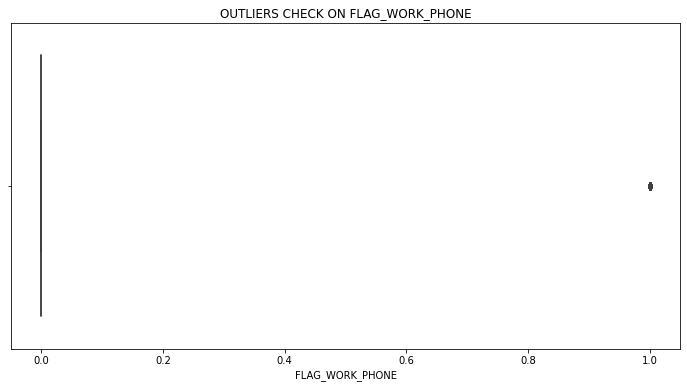

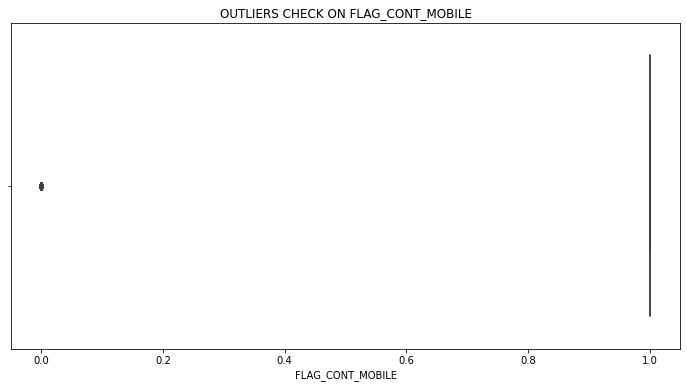

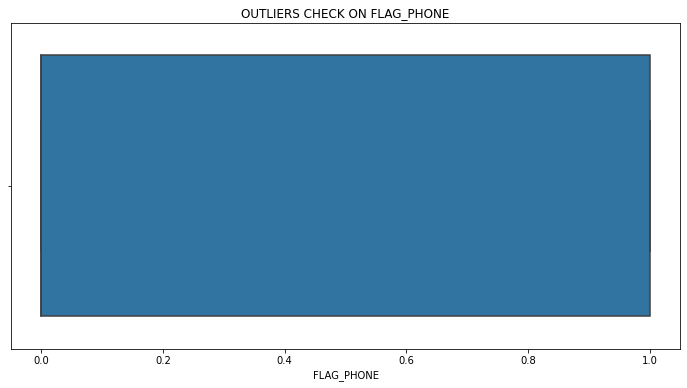

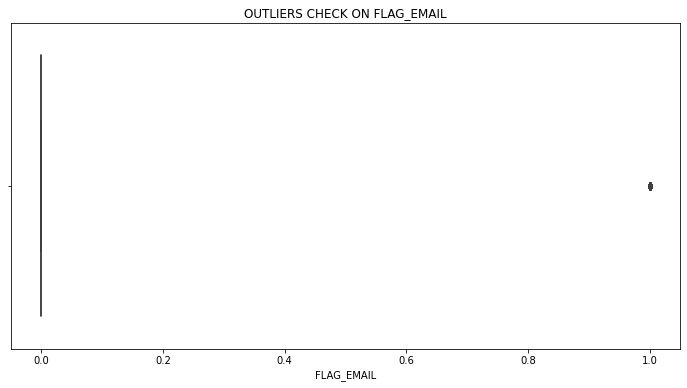

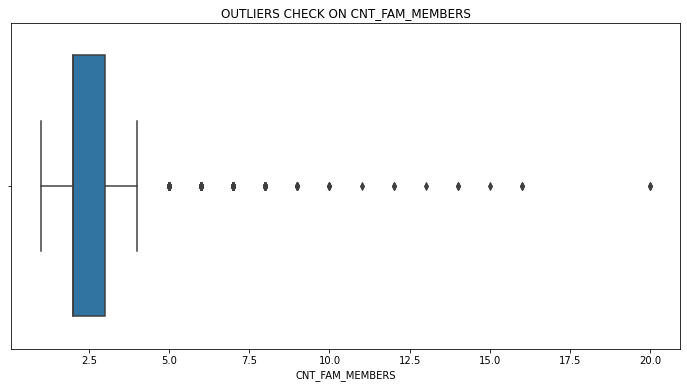

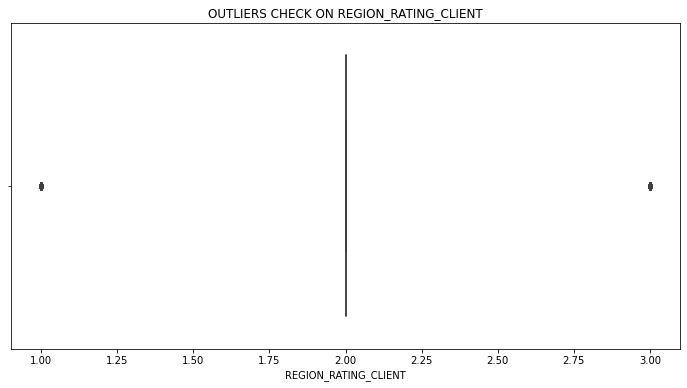

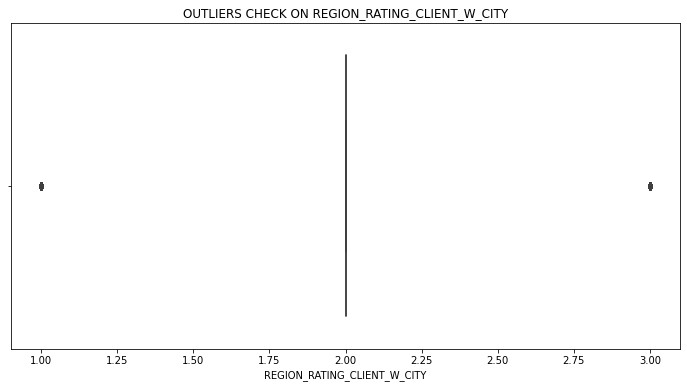

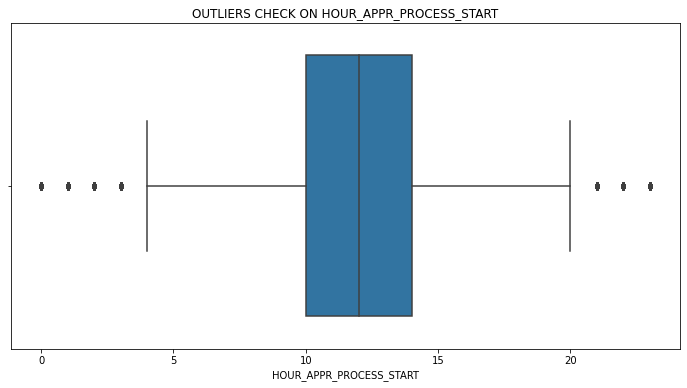

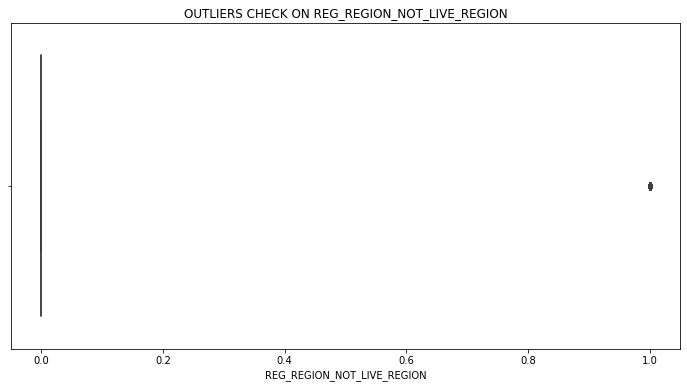

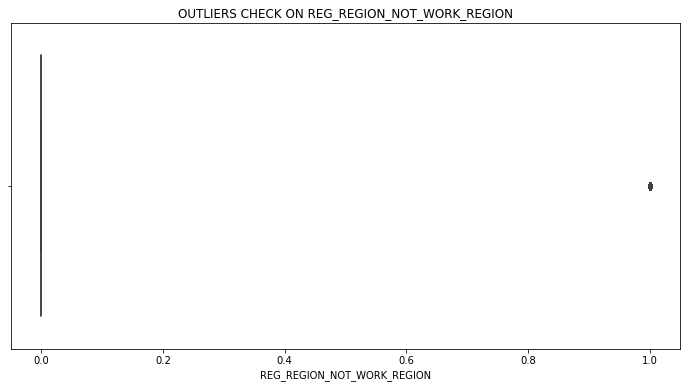

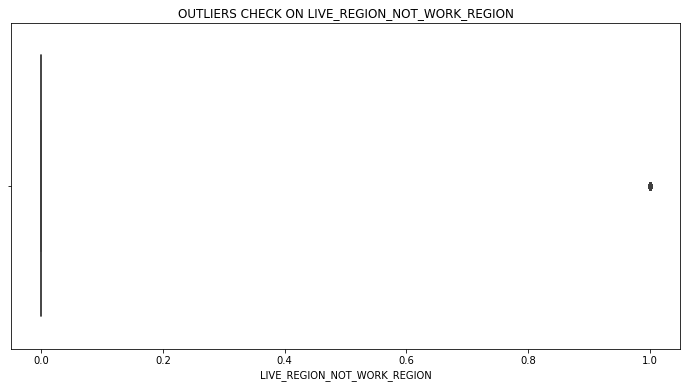

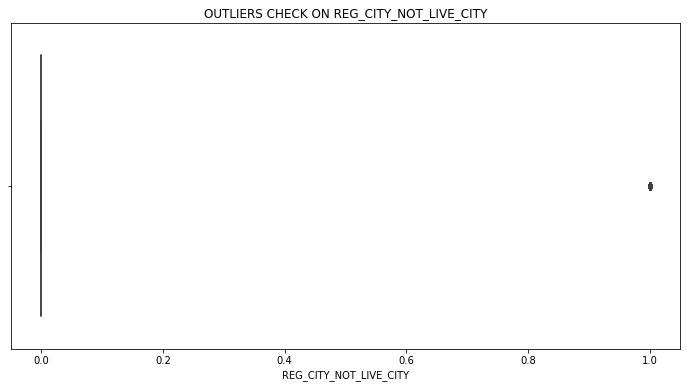

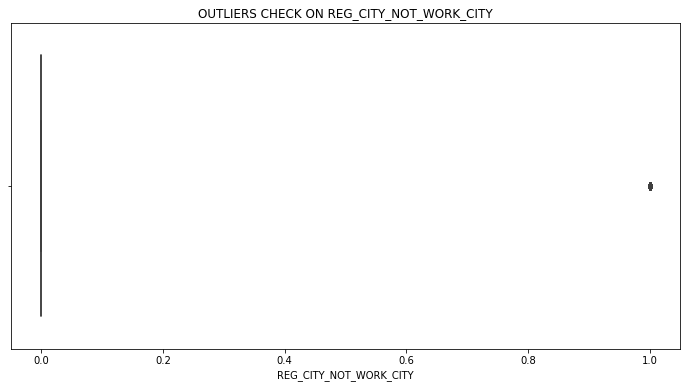

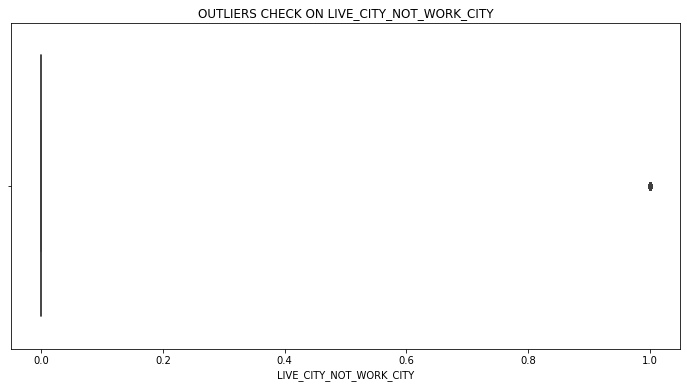

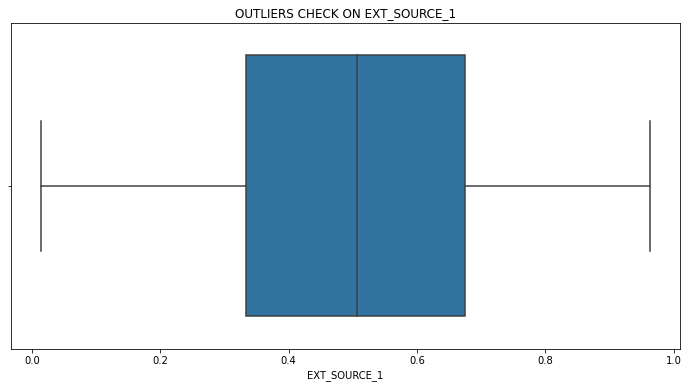

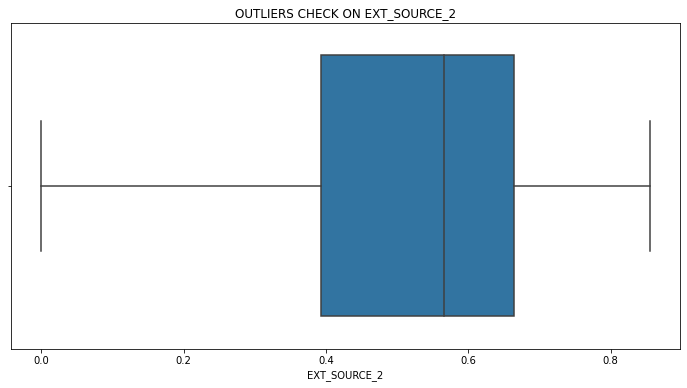

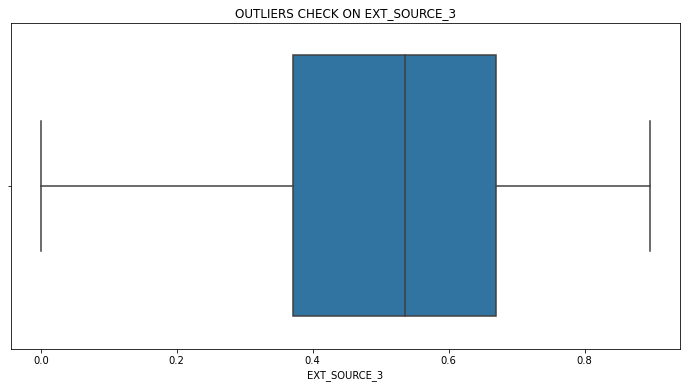

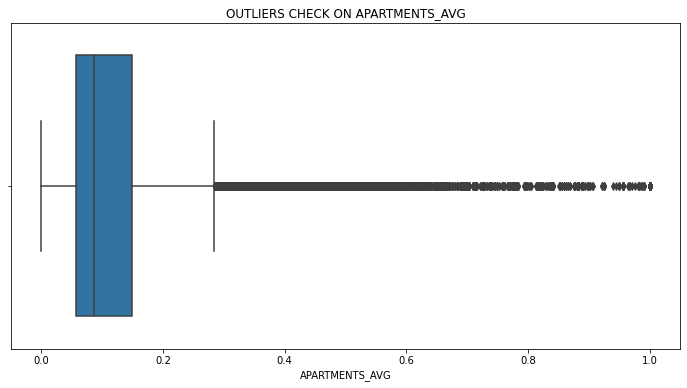

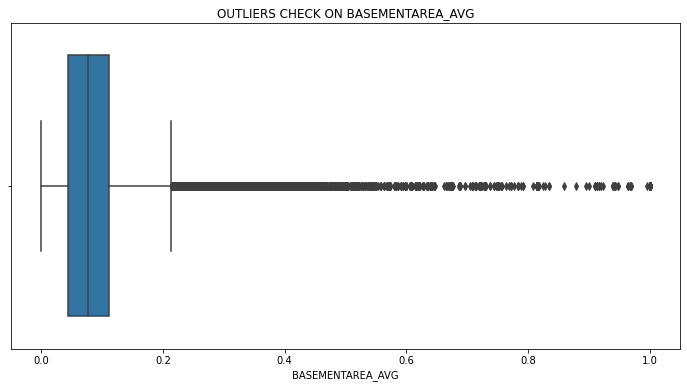

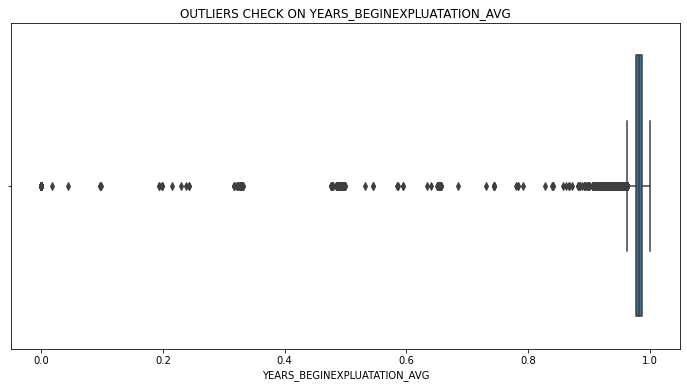

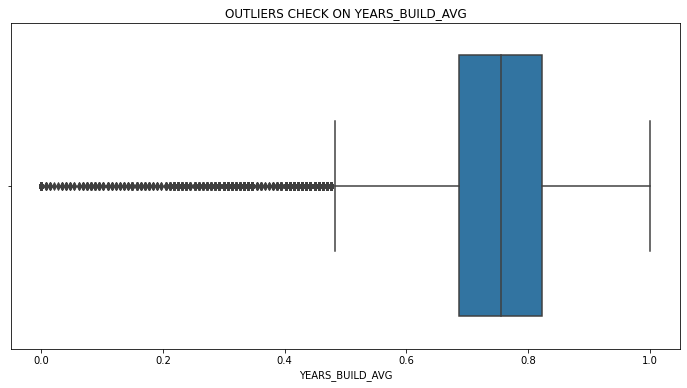

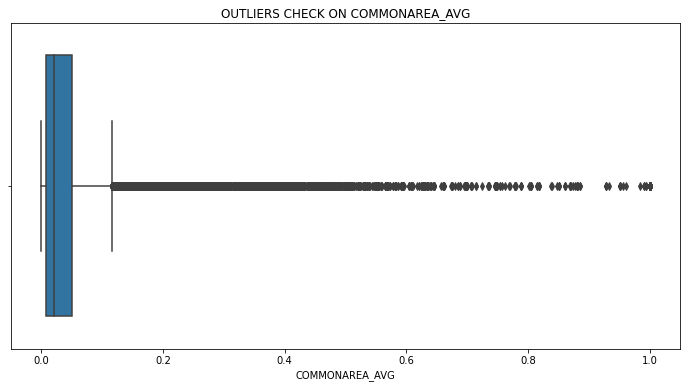

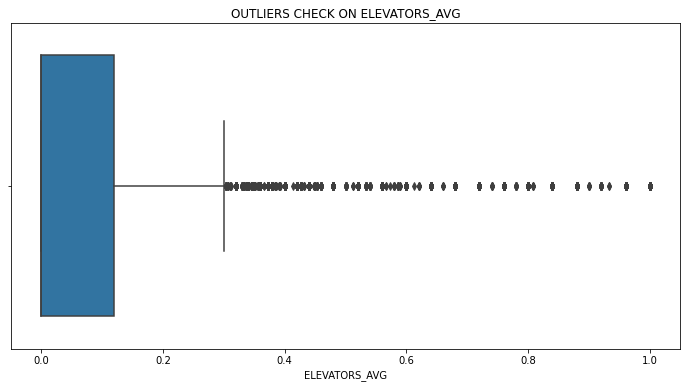

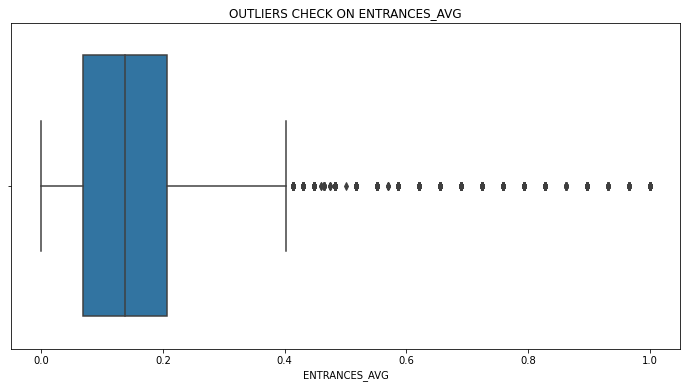

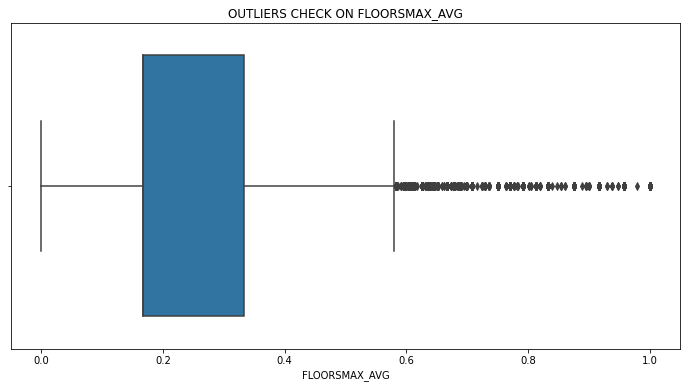

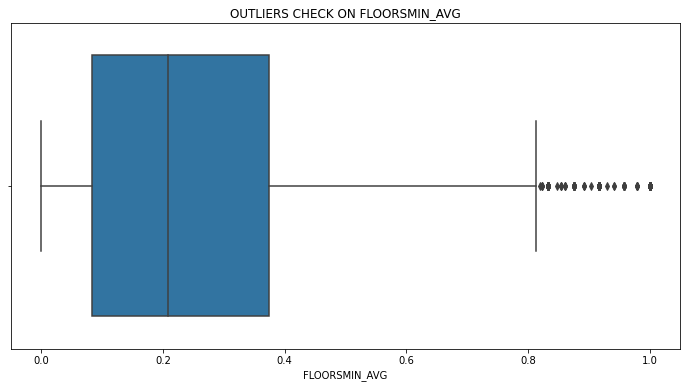

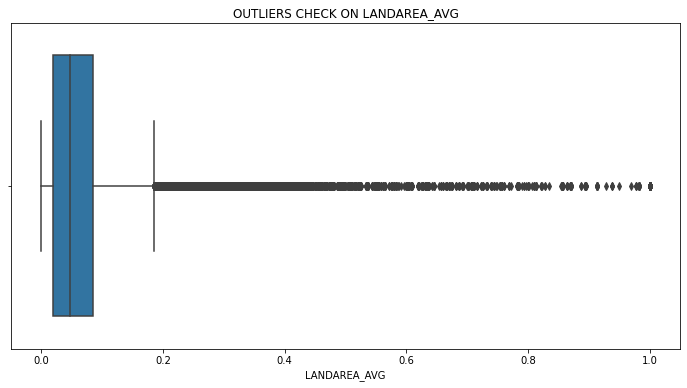

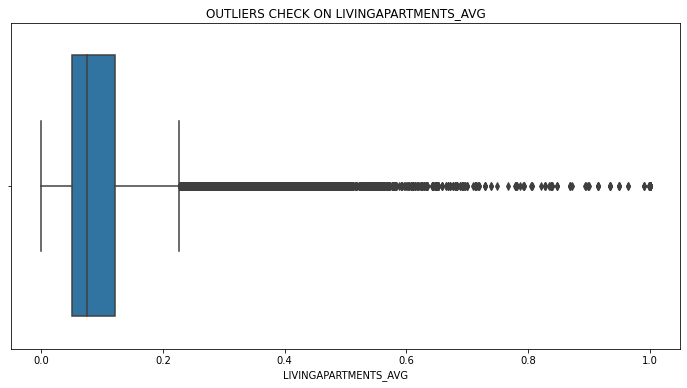

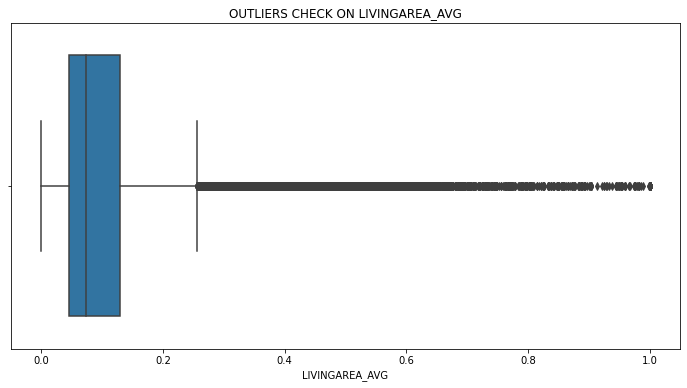

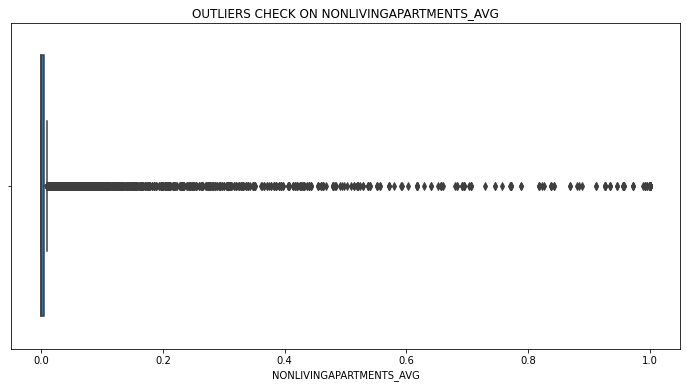

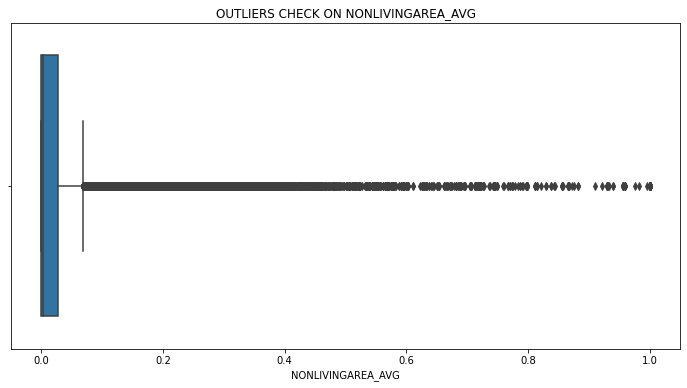

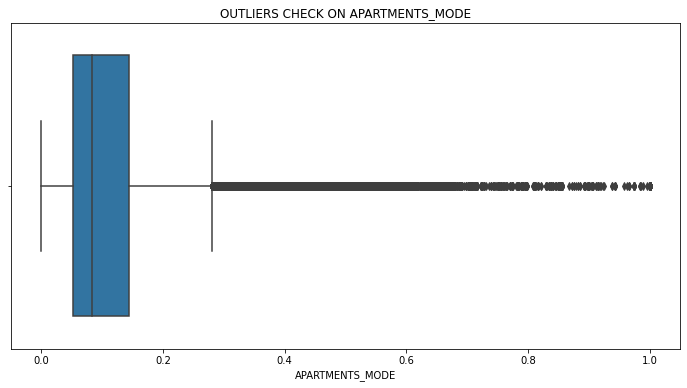

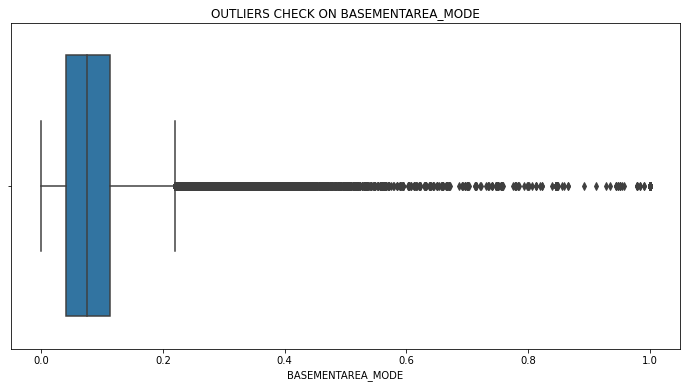

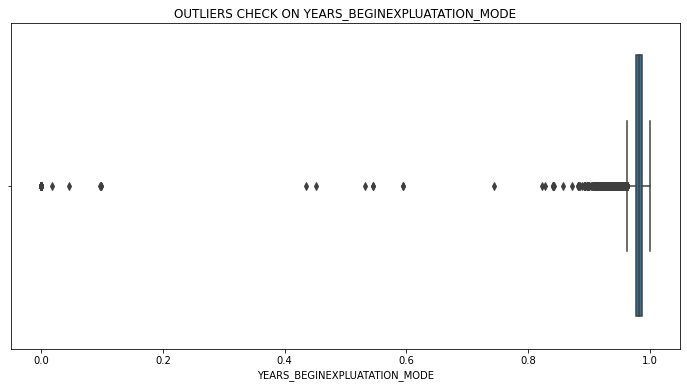

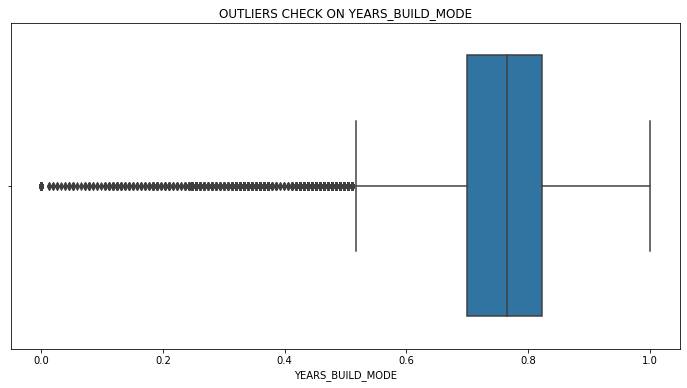

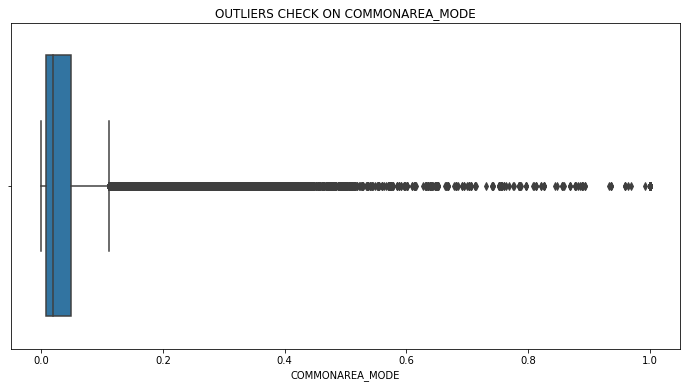

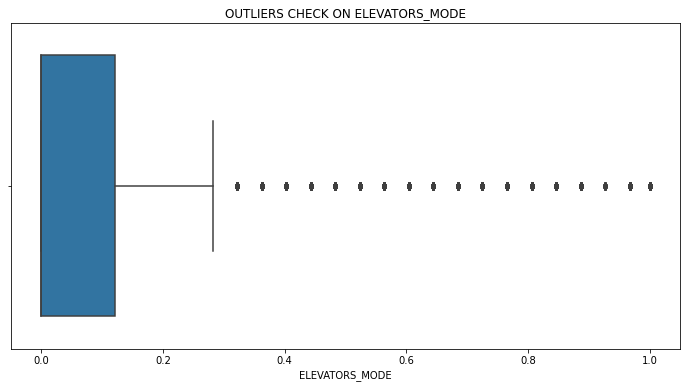

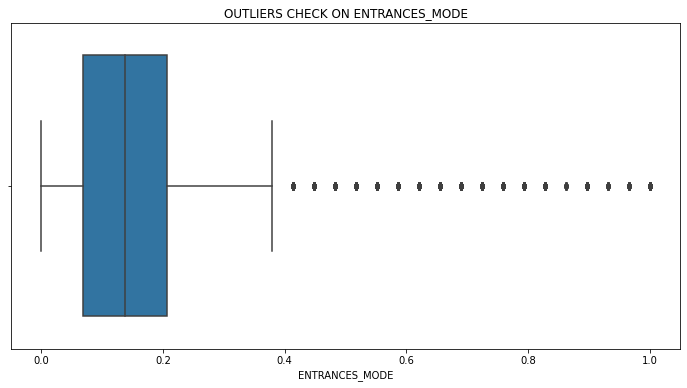

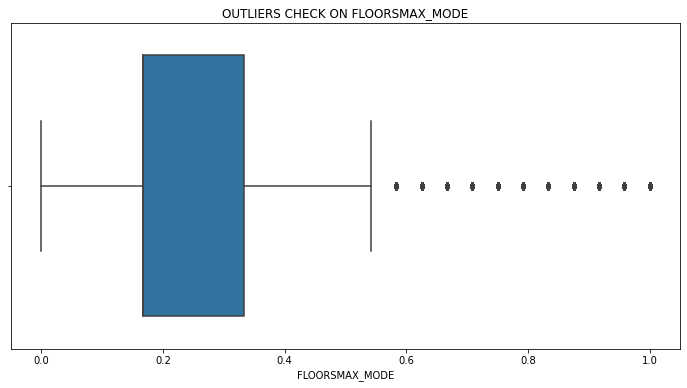

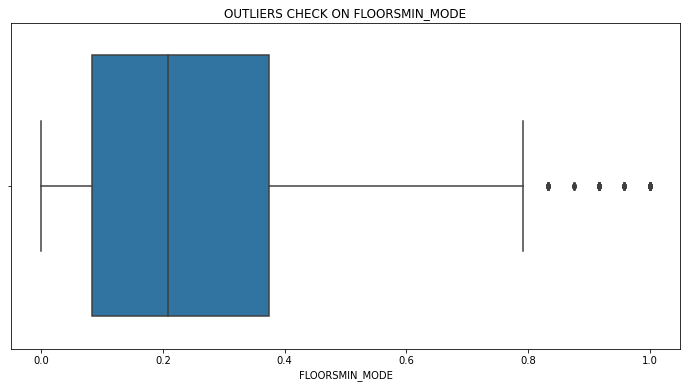

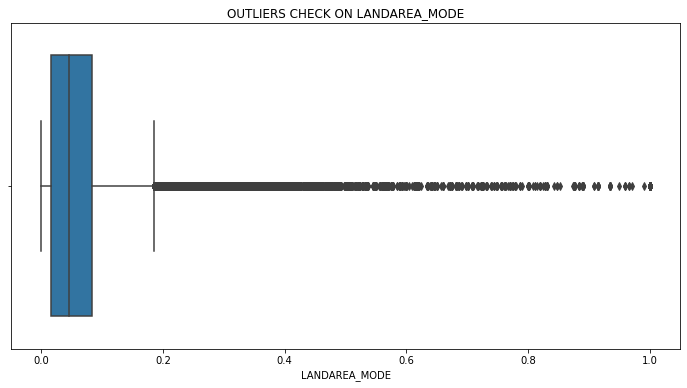

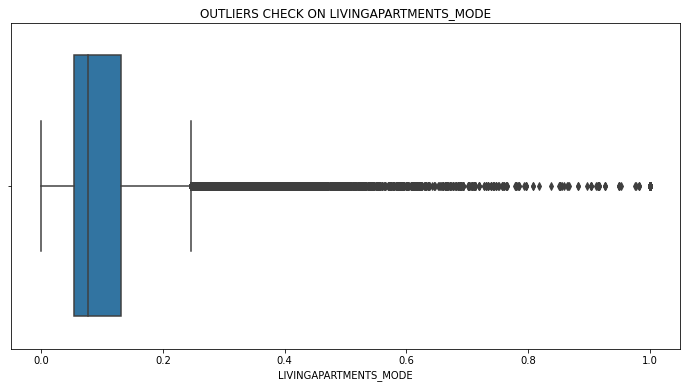

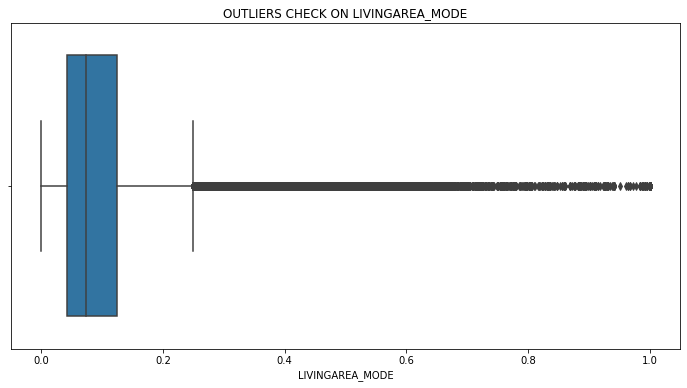

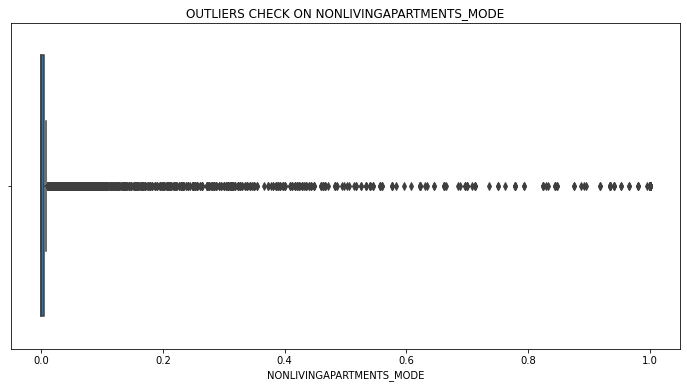

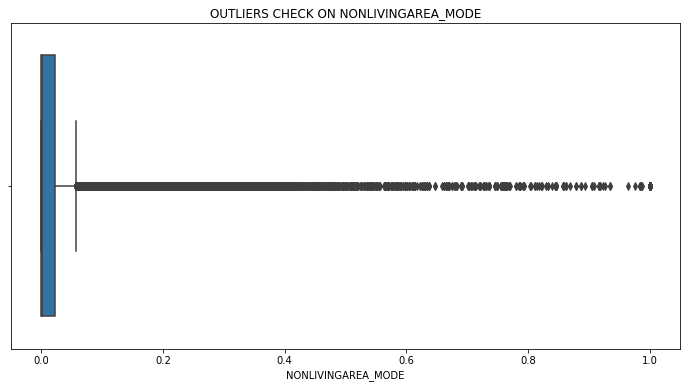

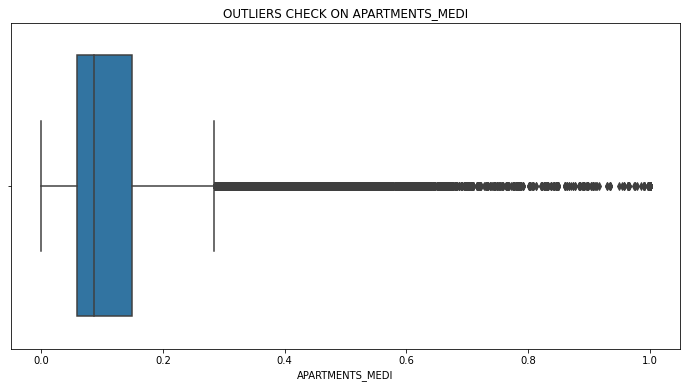

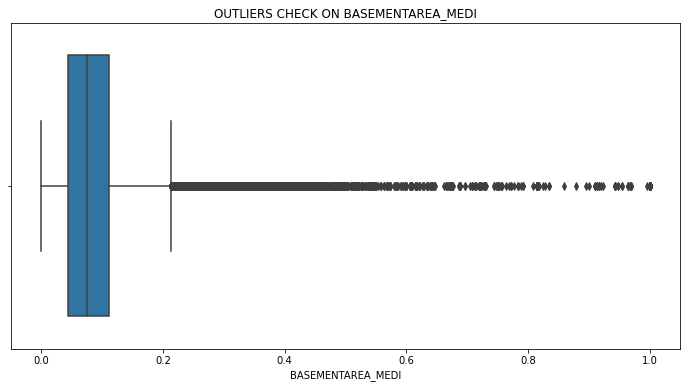

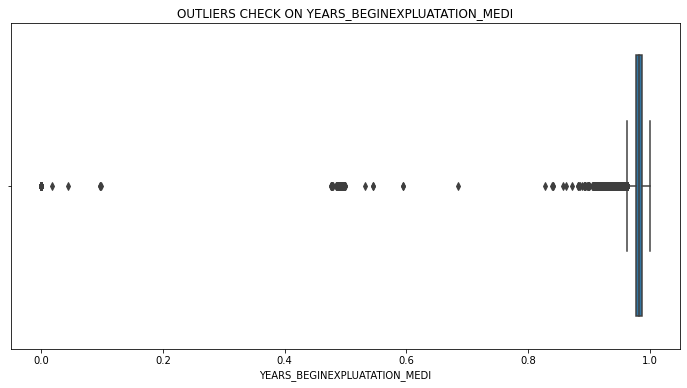

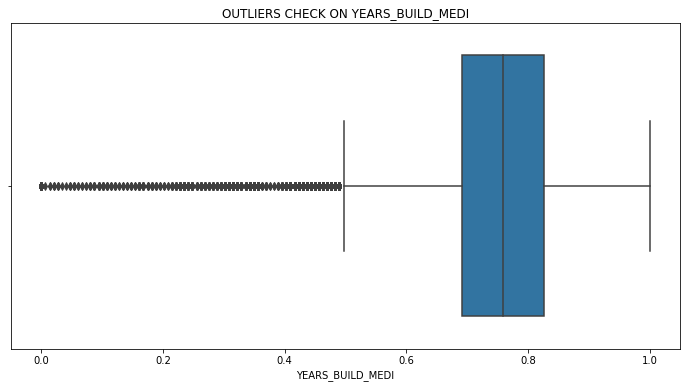

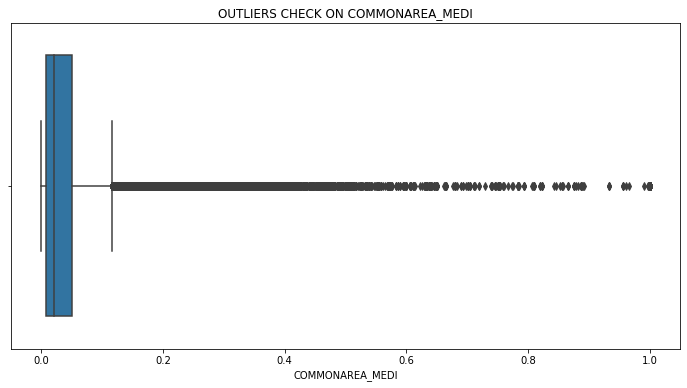

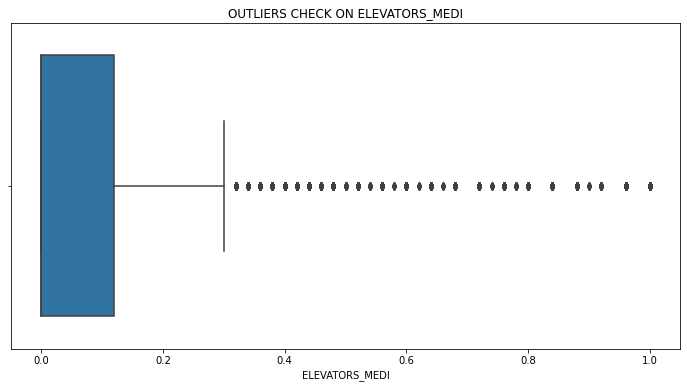

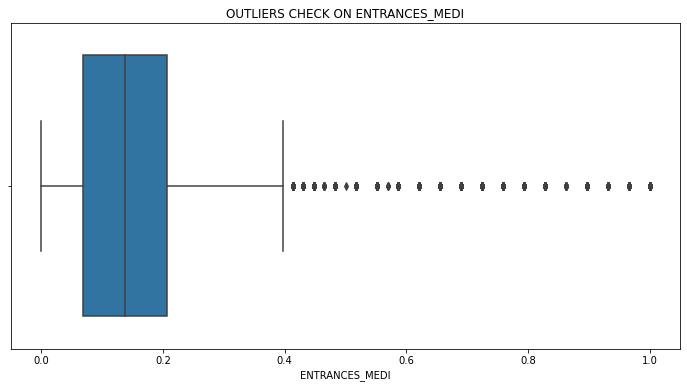

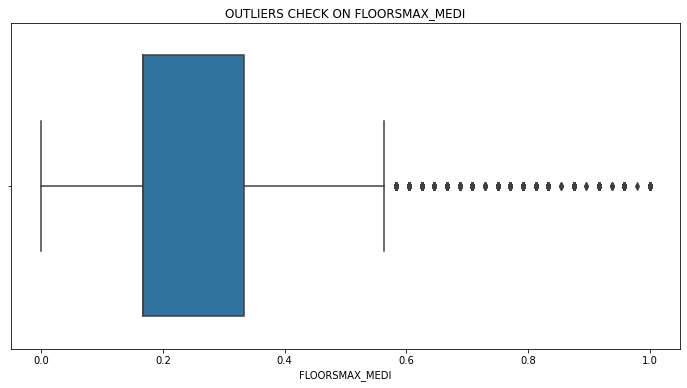

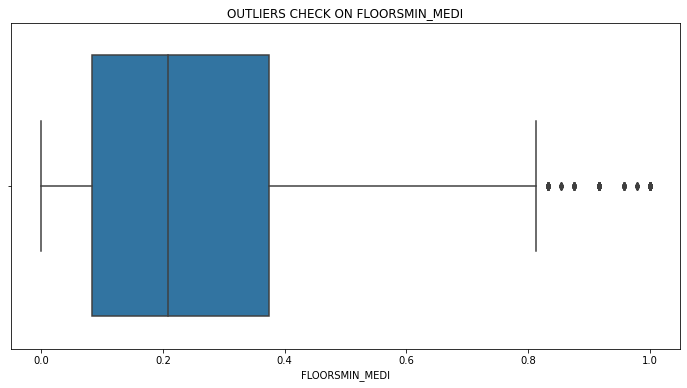

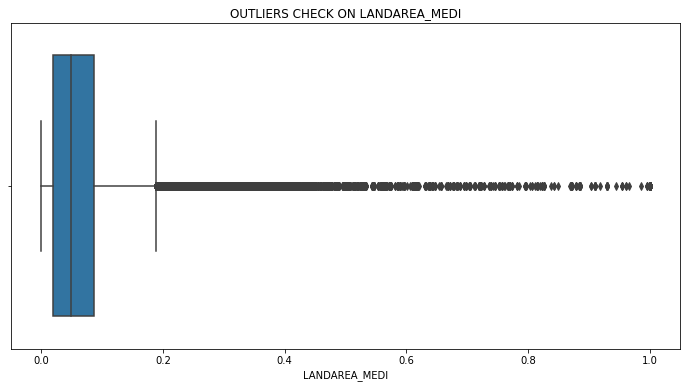

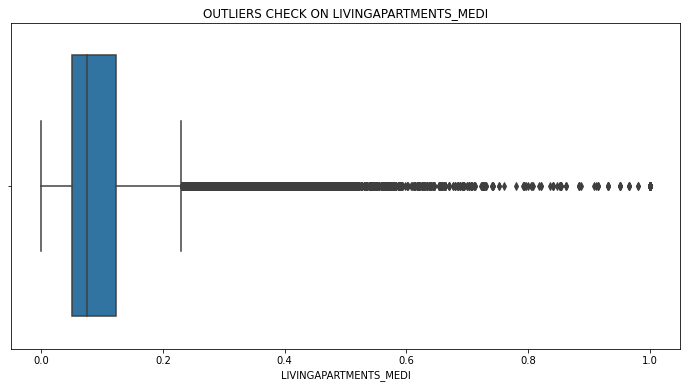

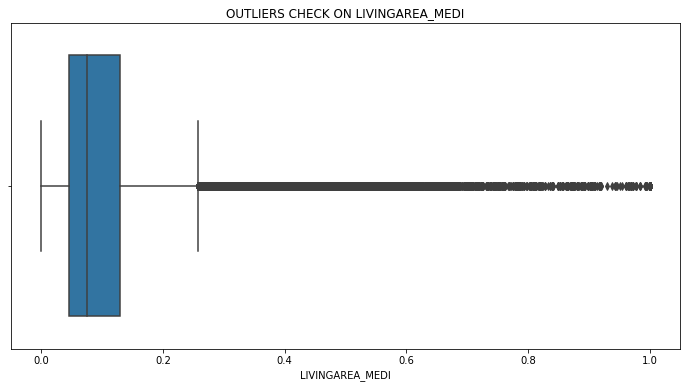

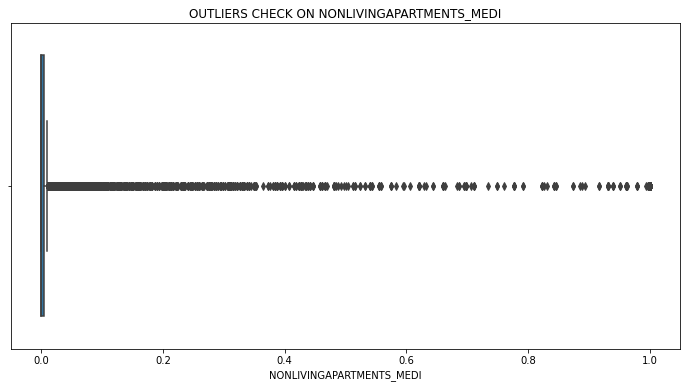

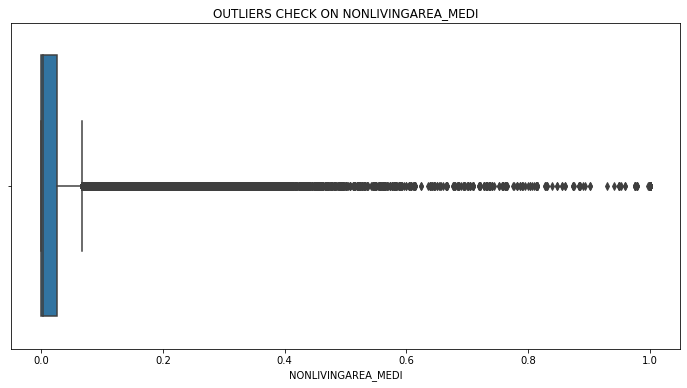

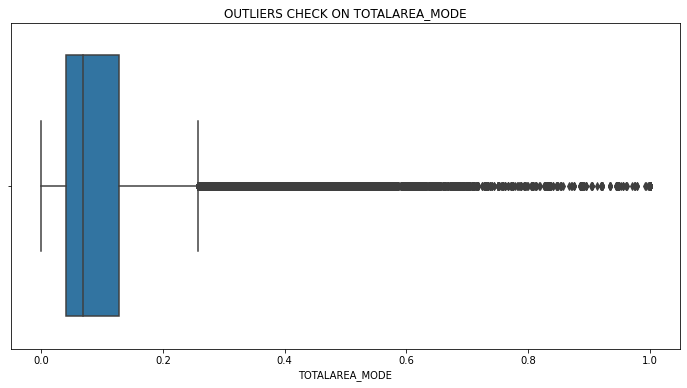

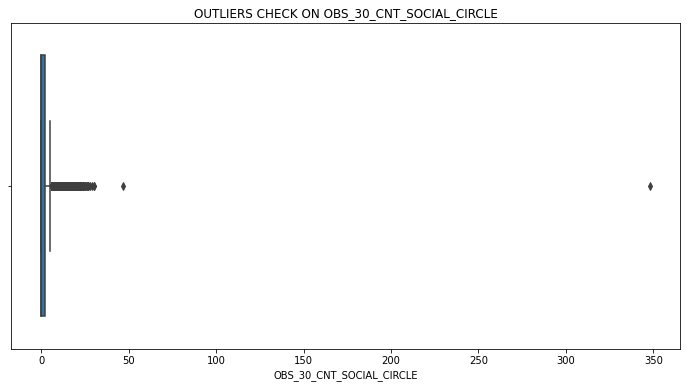

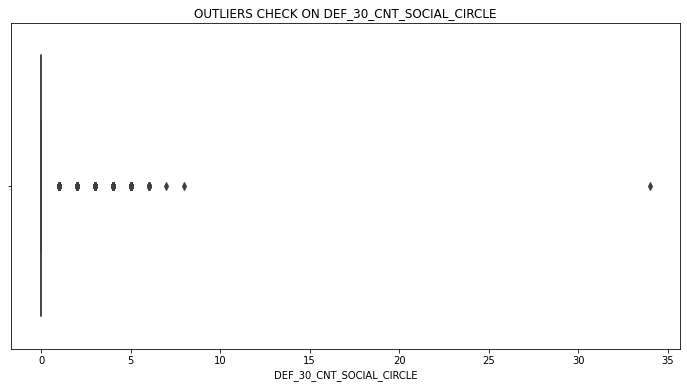

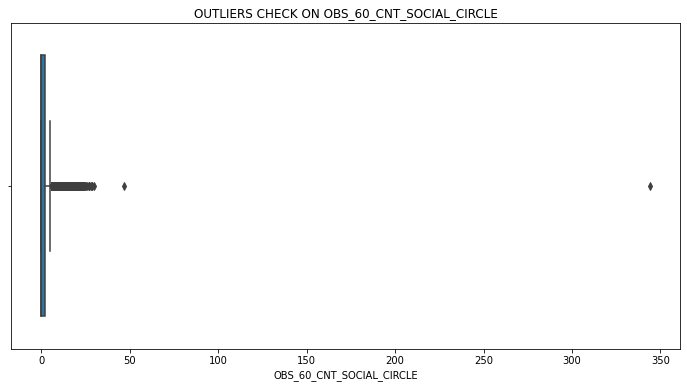

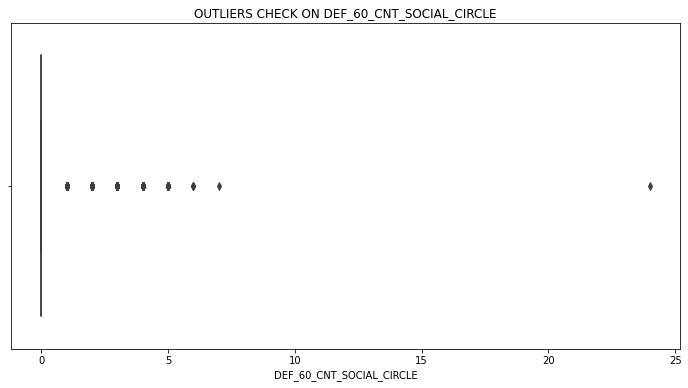

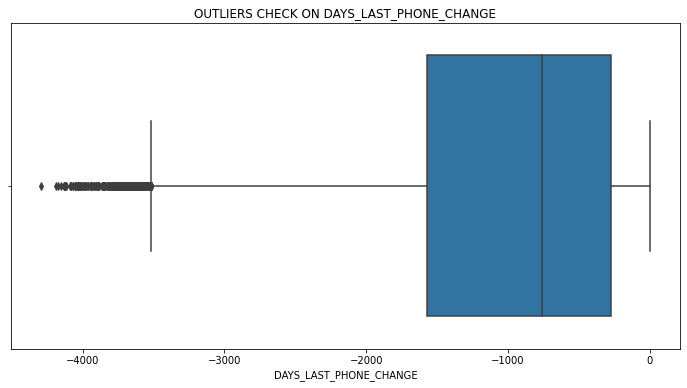

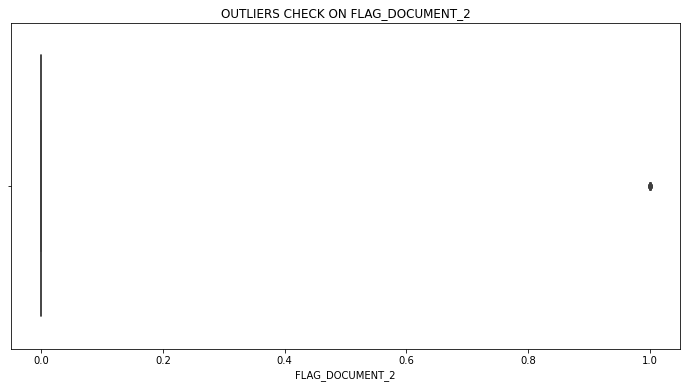

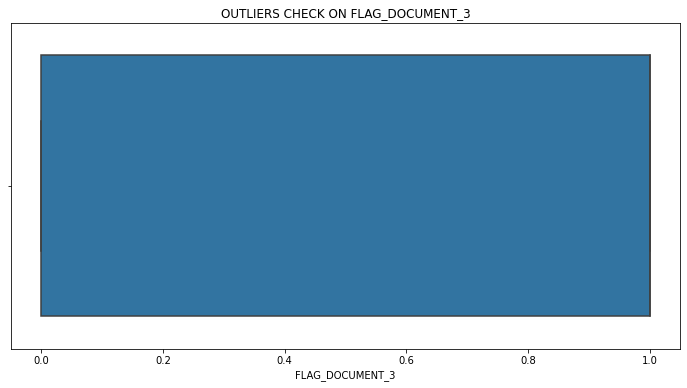

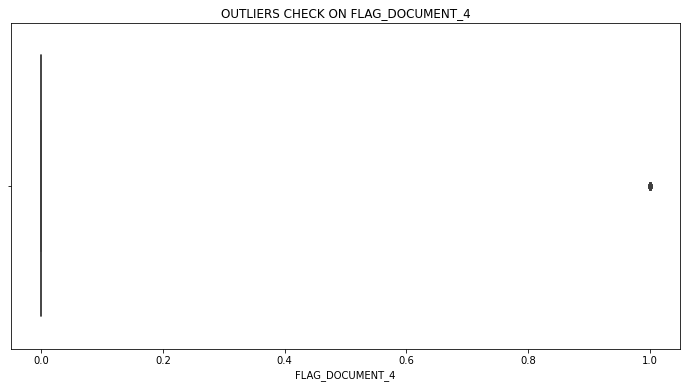

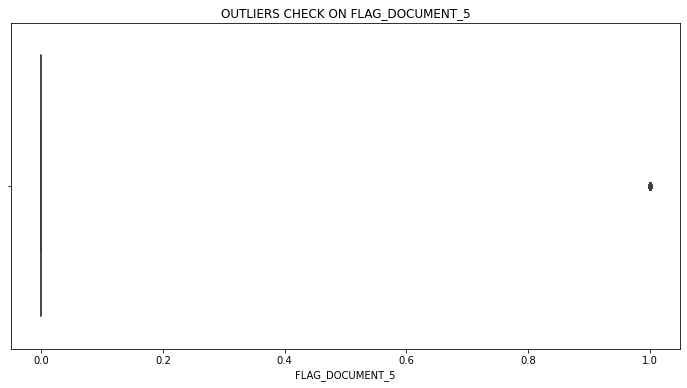

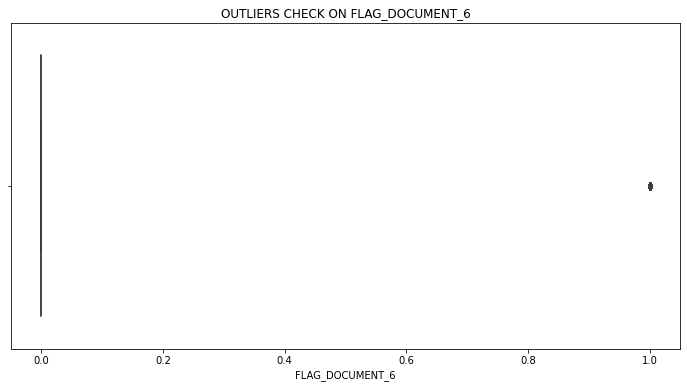

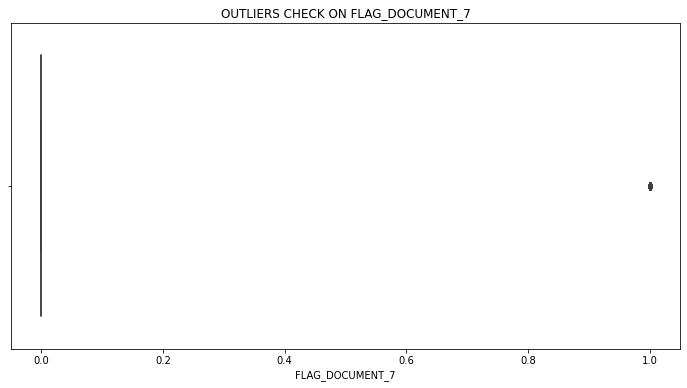

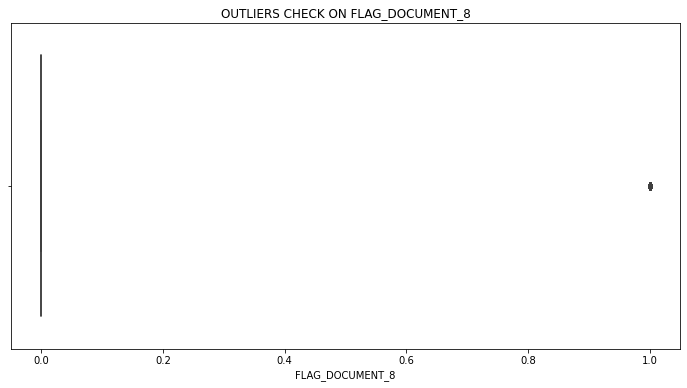

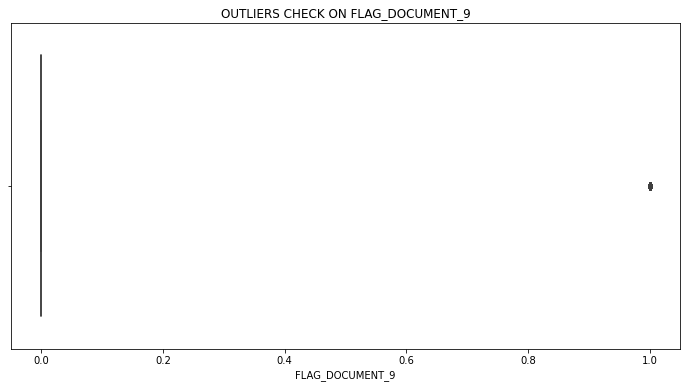

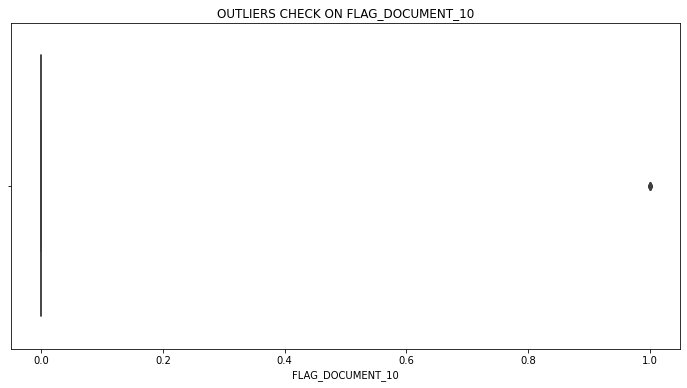

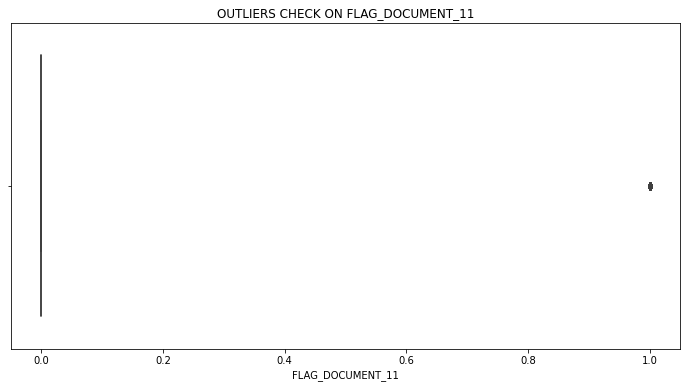

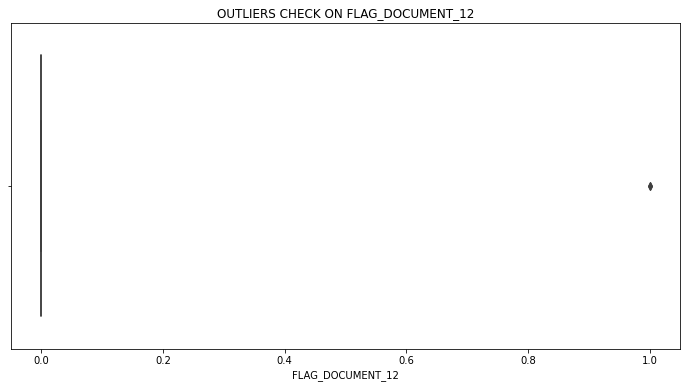

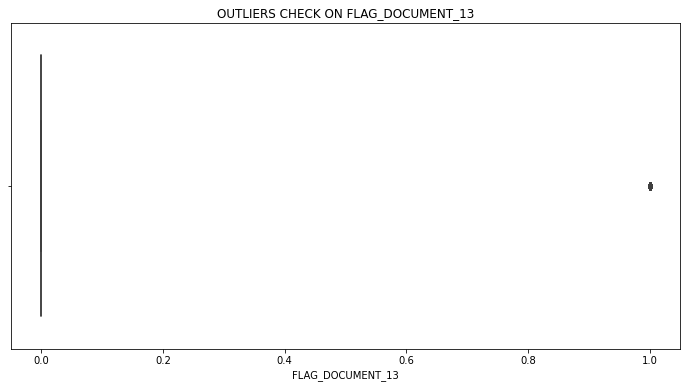

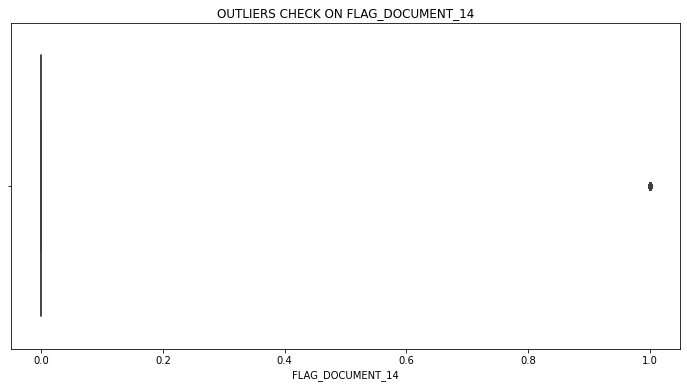

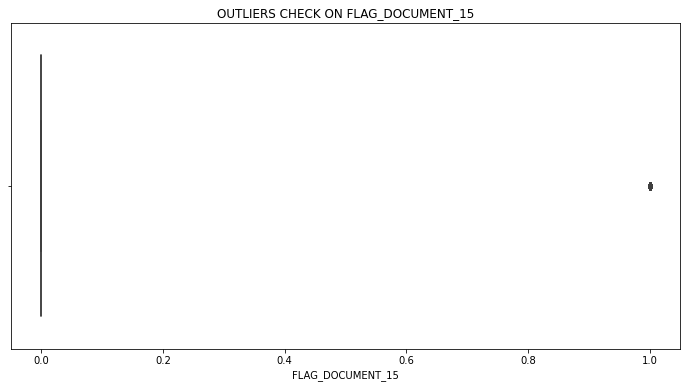

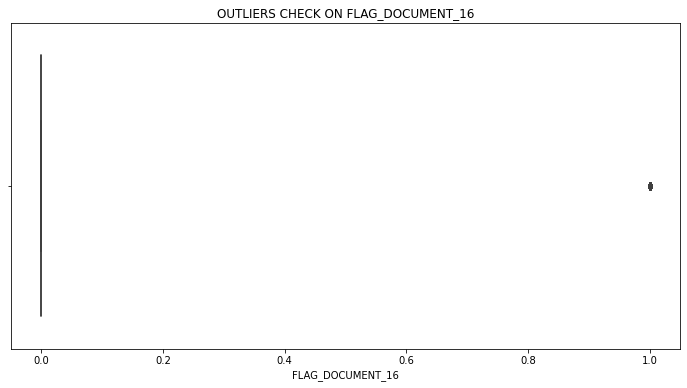

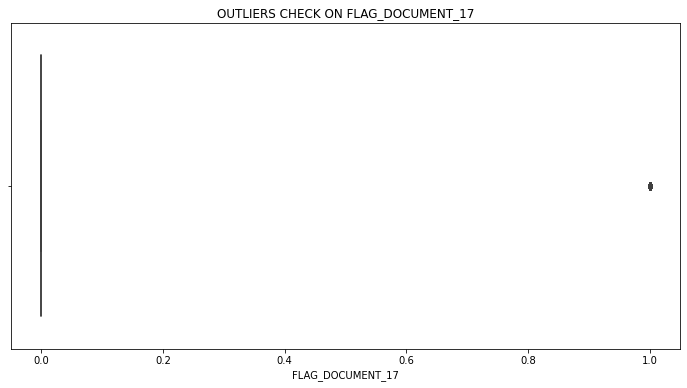

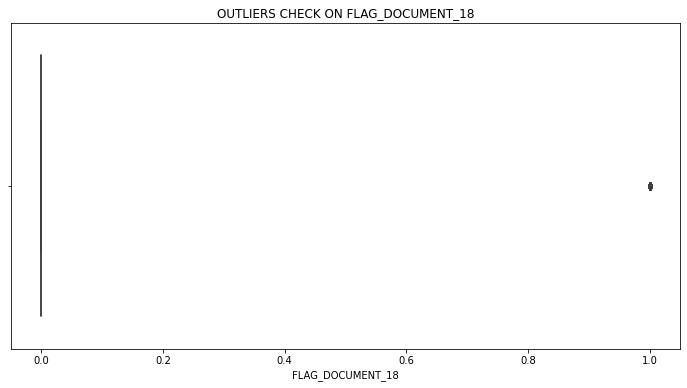

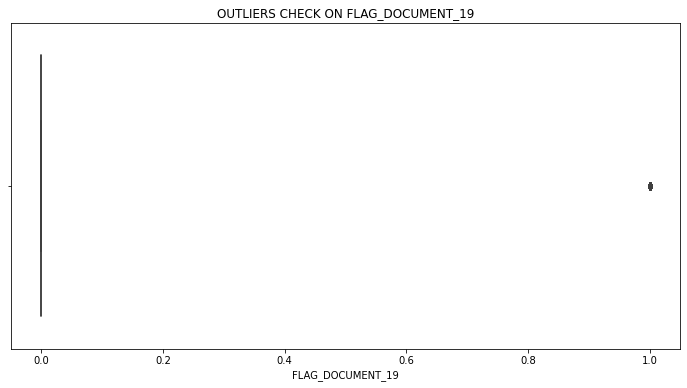

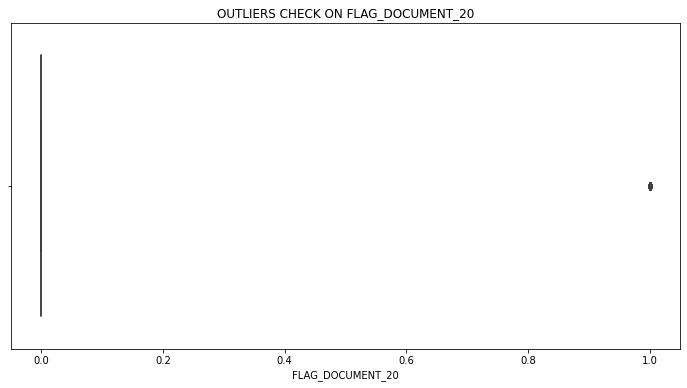

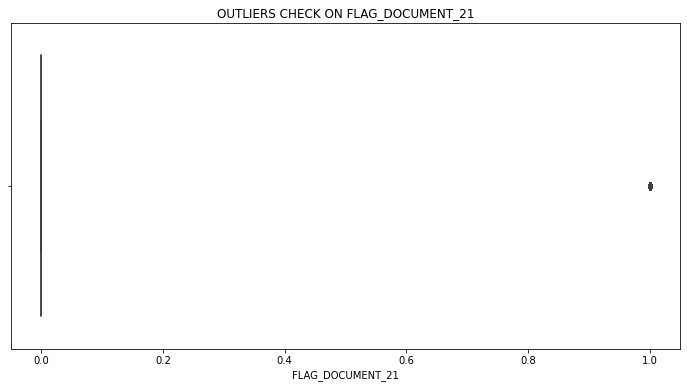

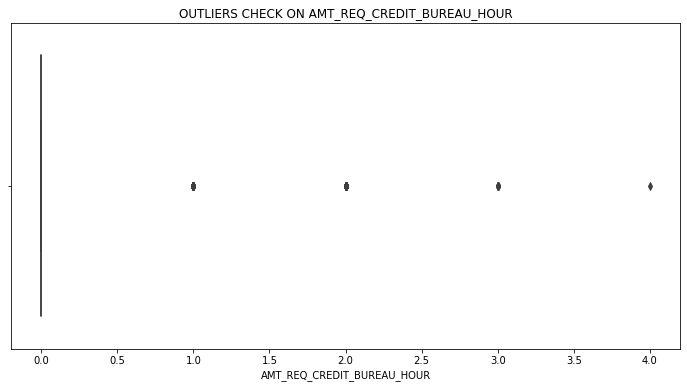

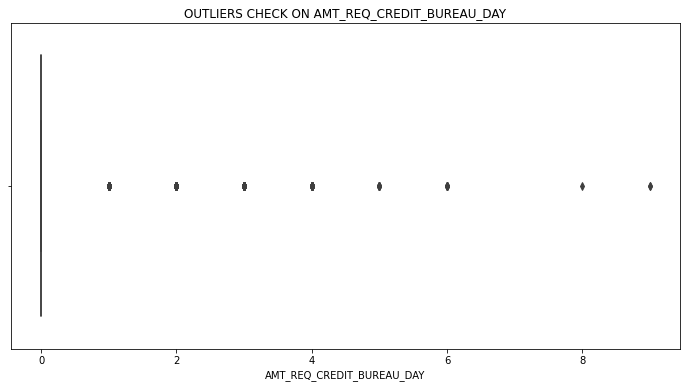

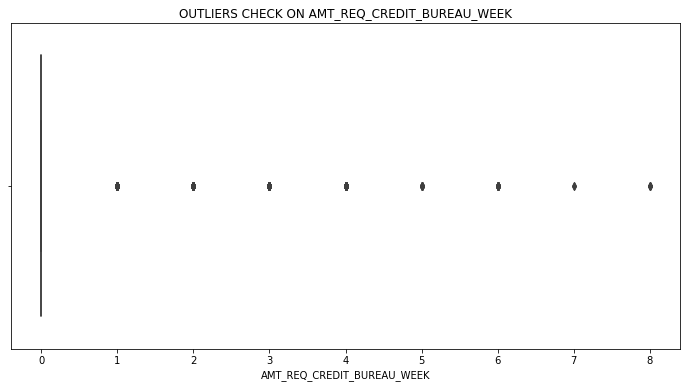

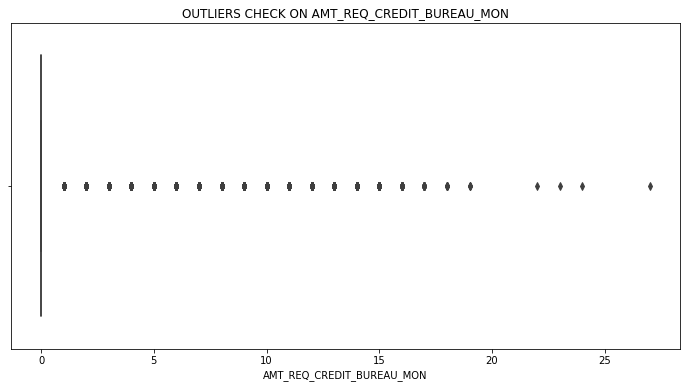

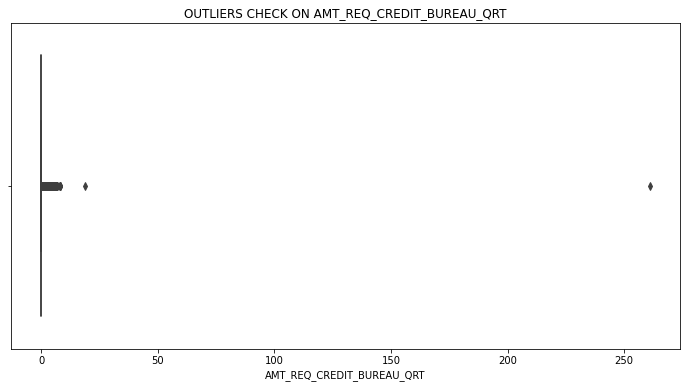

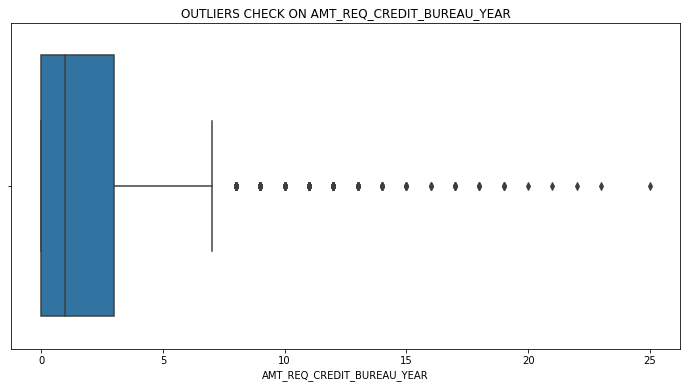

In [7]:
def multi_boxplot(y, d):
    plt.figure(figsize=(12,6))
    sns.boxplot(x = d[y], data=d, showfliers = True)
    plt.title('OUTLIERS CHECK ON '+ y)
    
    
for i in num_cols:
    multi_boxplot(i, df_train)


(307511, 122)
(307511, 122)
(307511, 122)


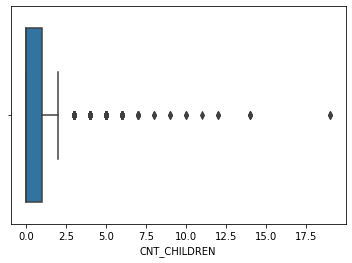

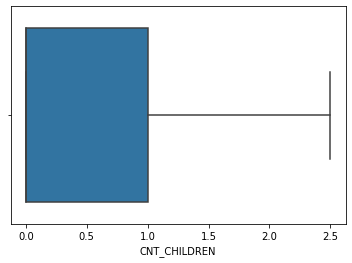

In [8]:
#############################################
# For sanity check; 
# select one column,
# compare before and after removing outliers 
#############################################

df_train2 = df_train.copy()

print(df_train.shape)
print(df_train2.shape)
for i in num_cols:
    outlier_replace(df_train2,i)
print(df_train2.shape)


select = 'CNT_CHILDREN' #'CNT_CHILDREN'  #'AMT_ANNUITY'
sns.boxplot(x = df_train[select], data=df_train, showfliers = True)
plt.show()
sns.boxplot(x = df_train2[select], data=df_train2, showfliers = True) 
plt.show()


In [9]:
##########################################################################
for i in num_cols:
    outlier_replace(df_train,i)
    outlier_replace(df_test, i)


In [10]:
####################################################
# Fill nan with median values for numerical columns 
####################################################

df_train = df_train.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
df_test = df_test.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)

['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MO

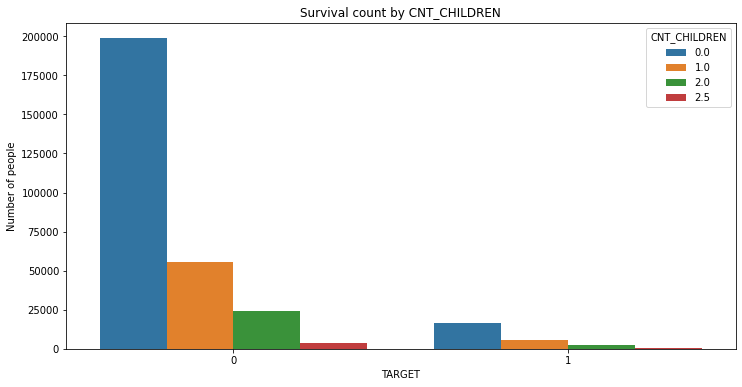

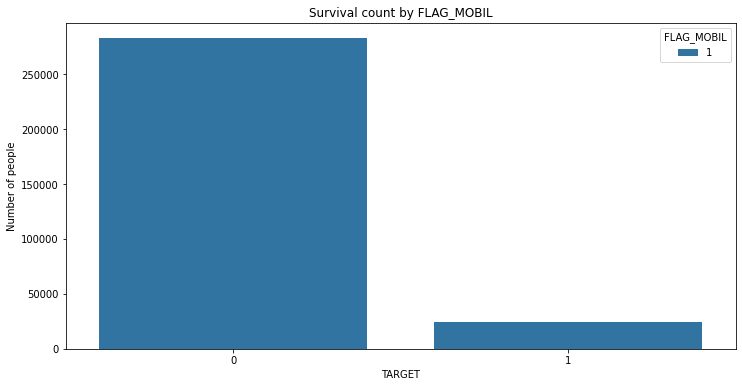

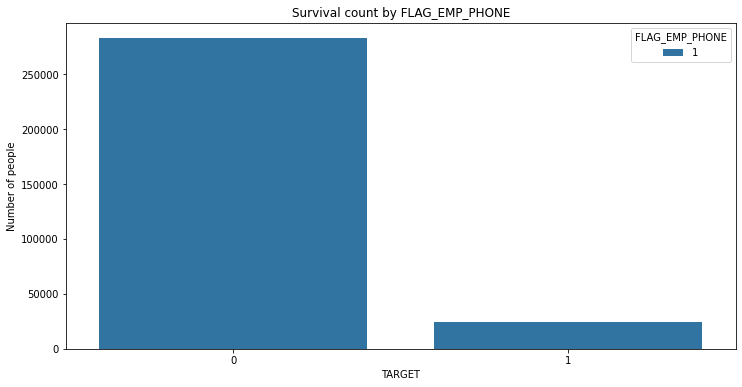

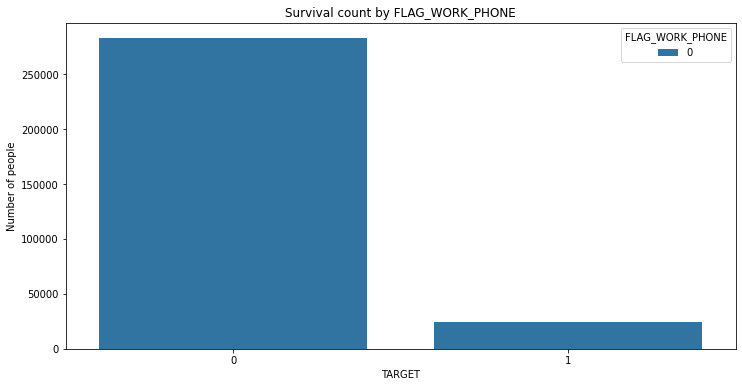

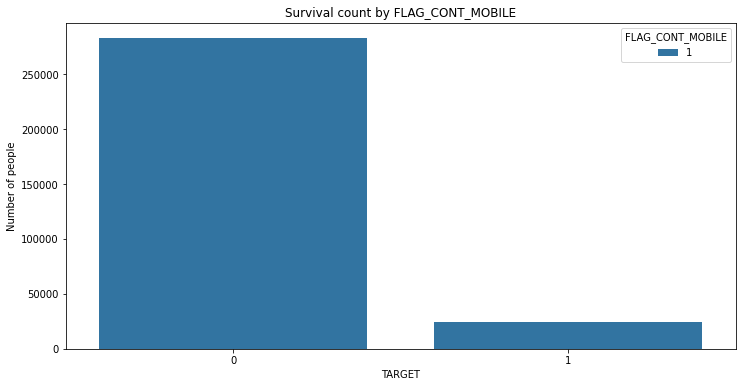

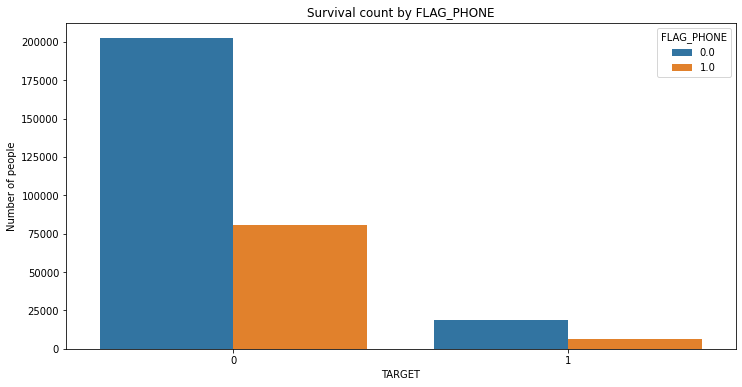

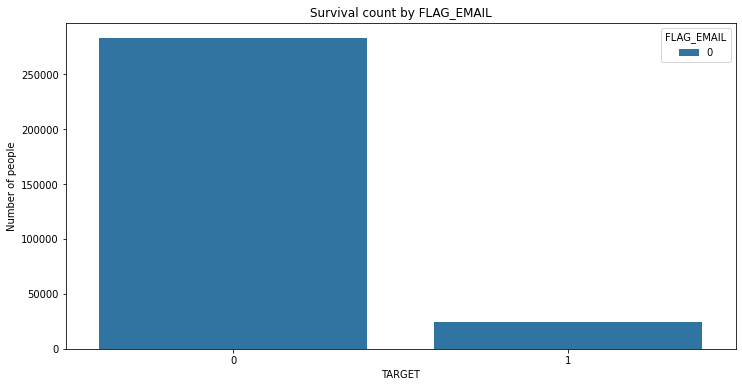

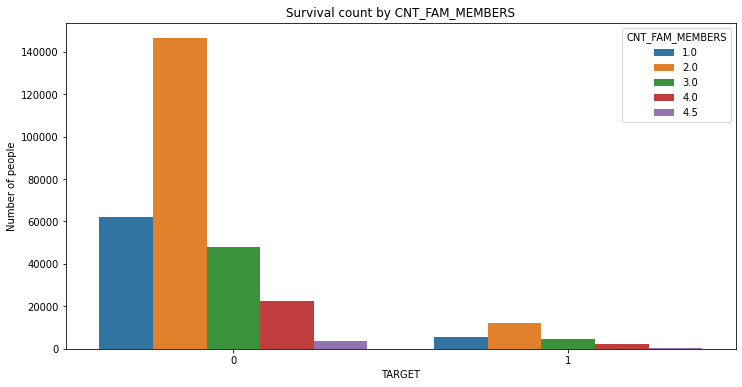

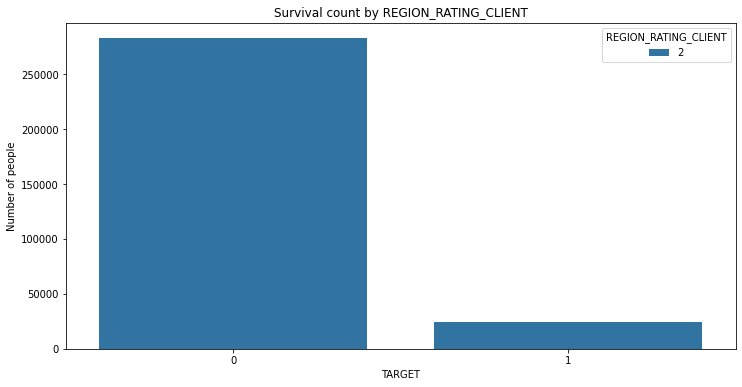

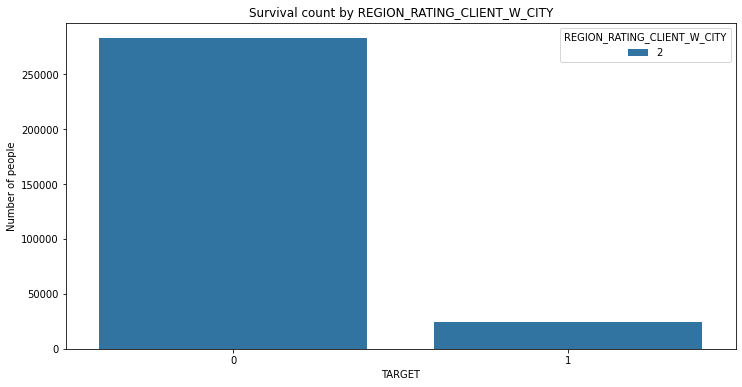

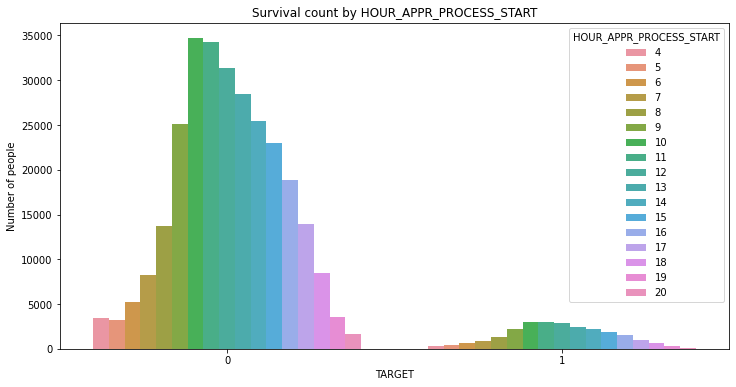

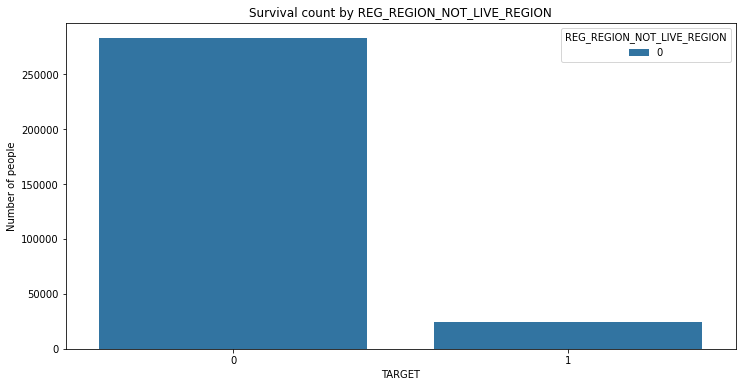

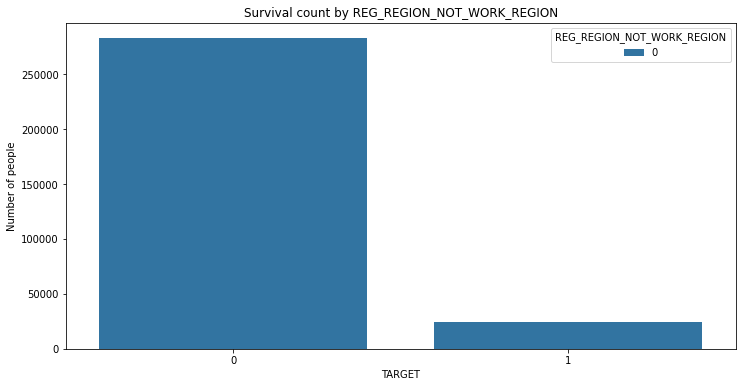

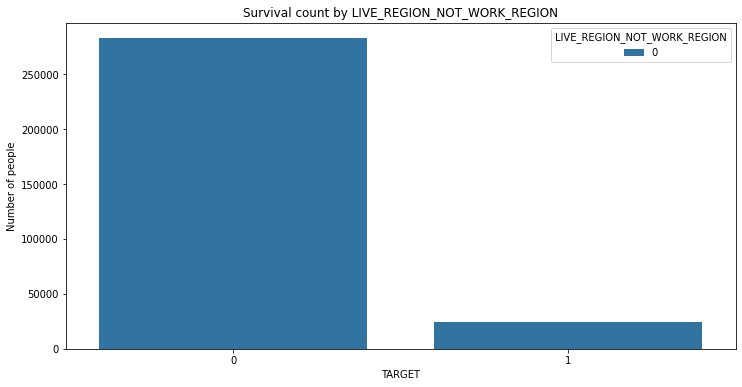

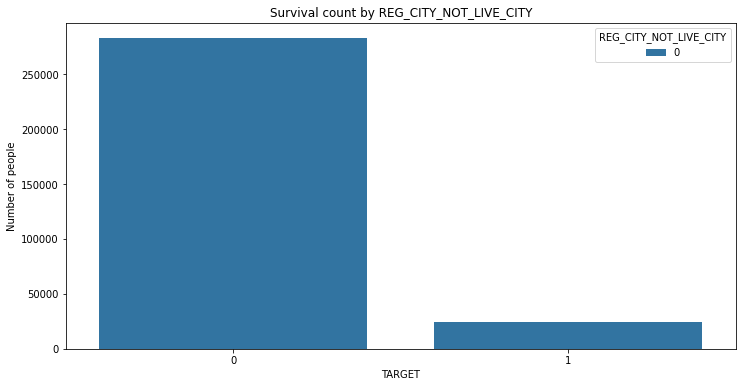

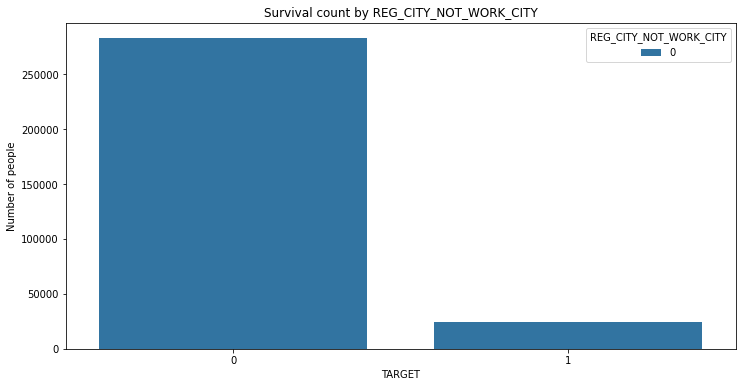

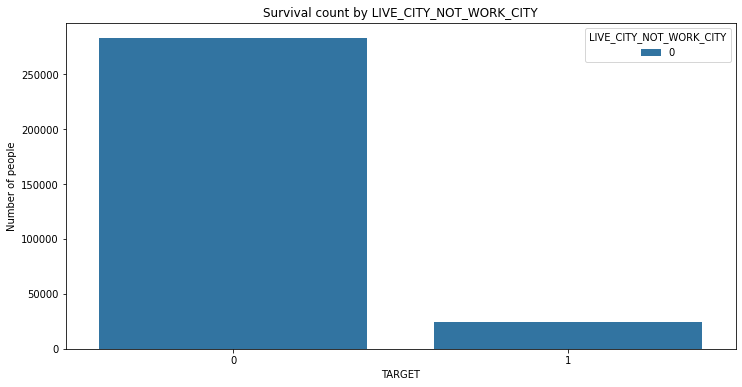

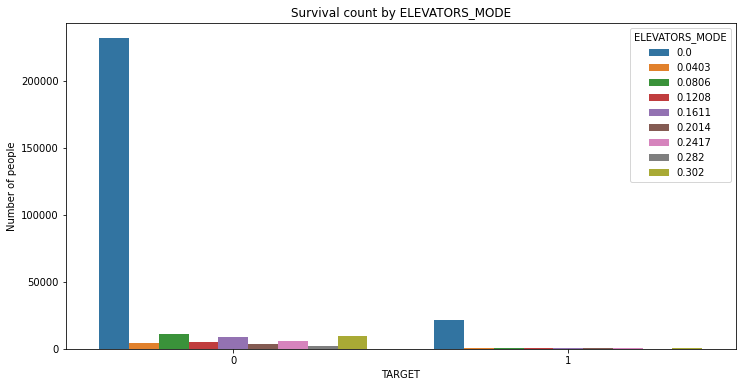

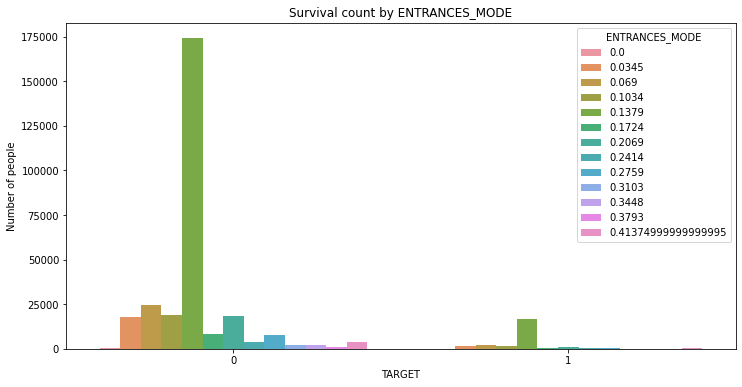

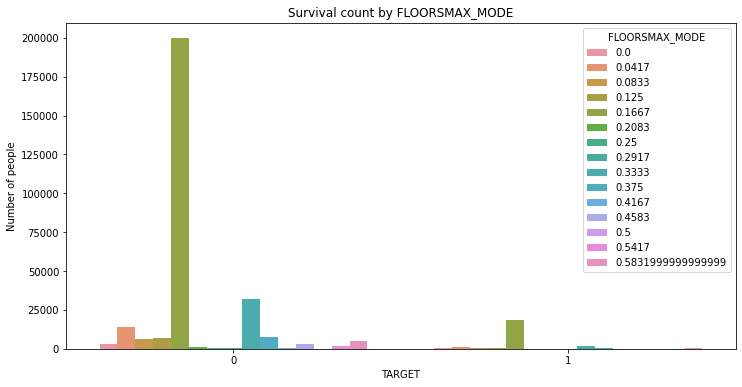

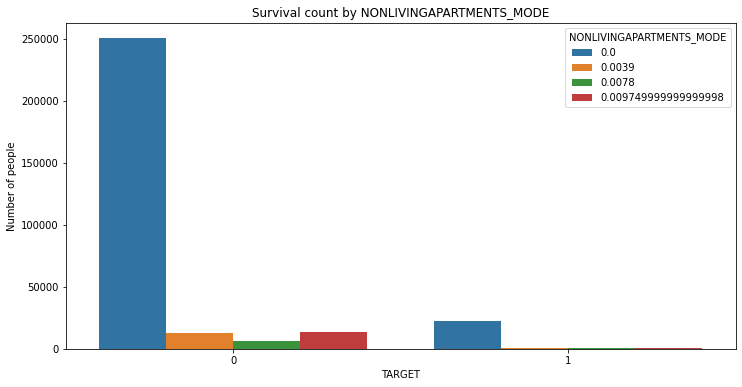

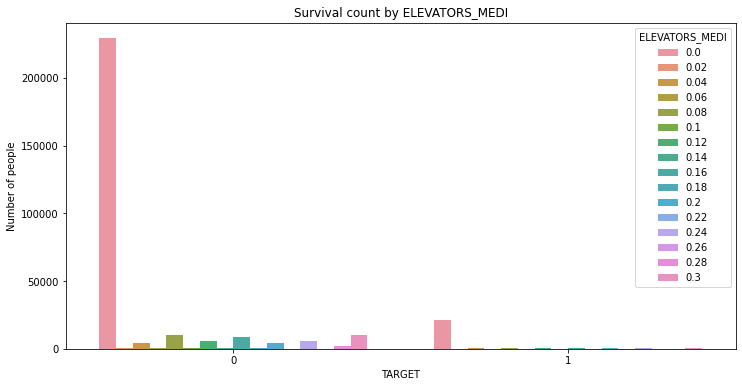

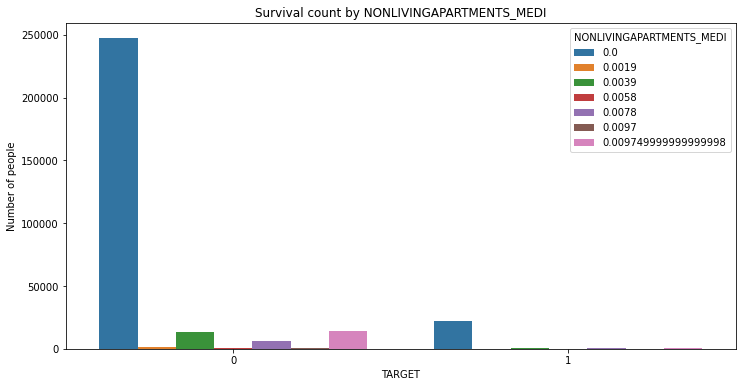

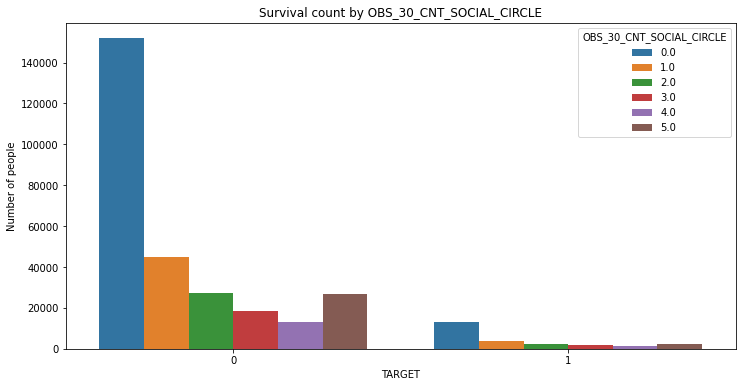

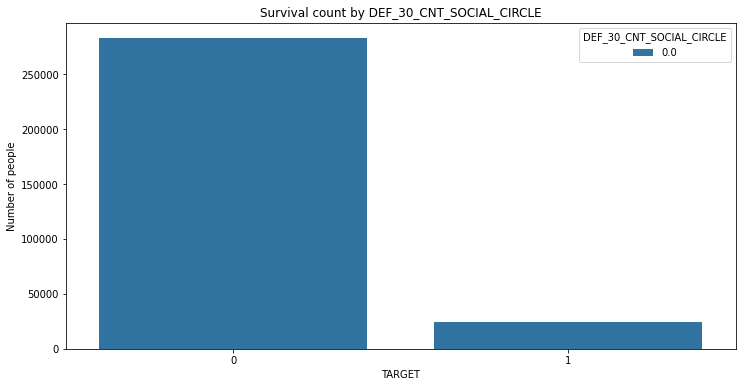

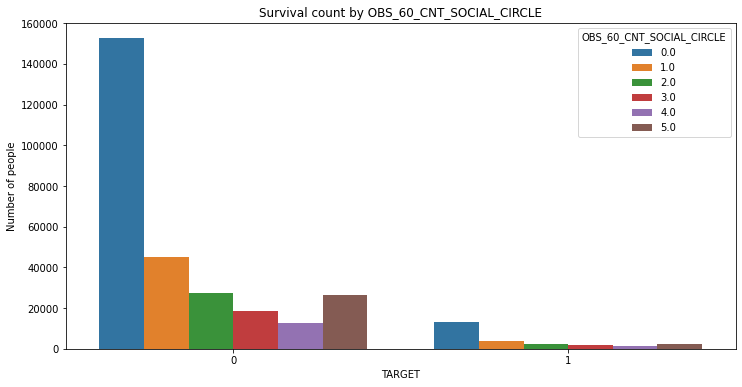

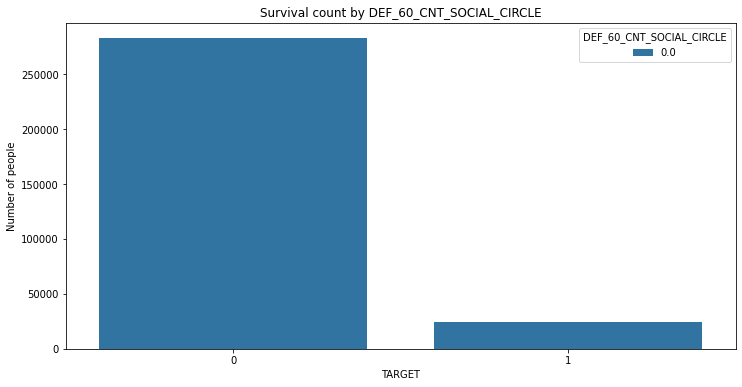

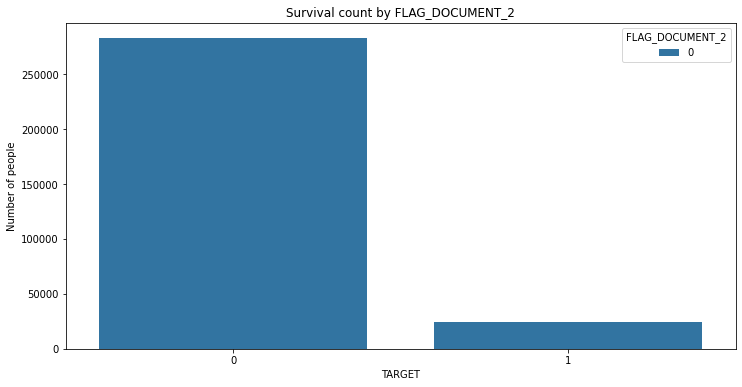

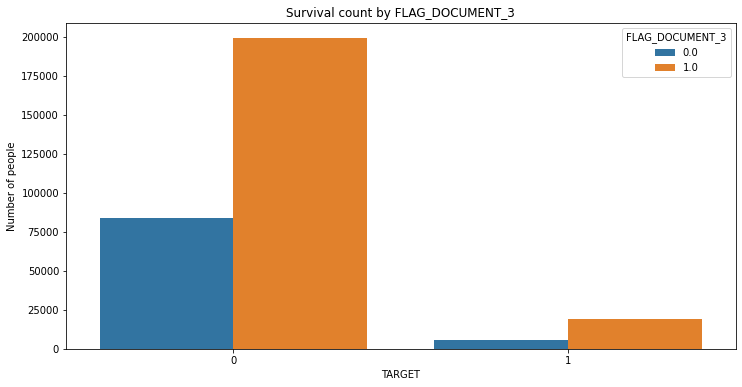

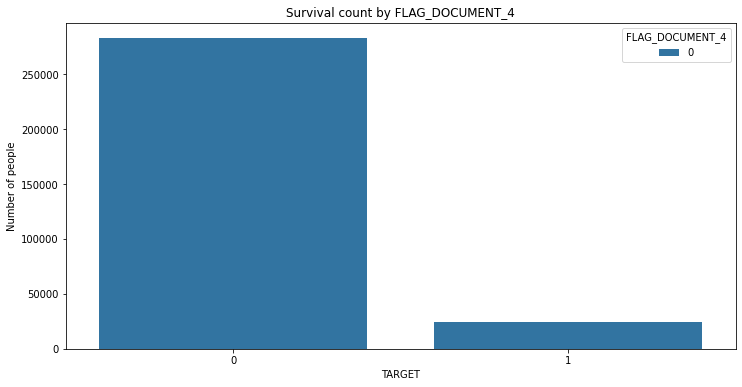

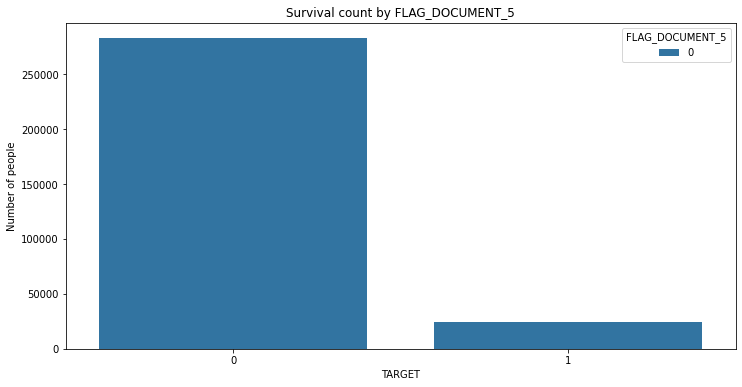

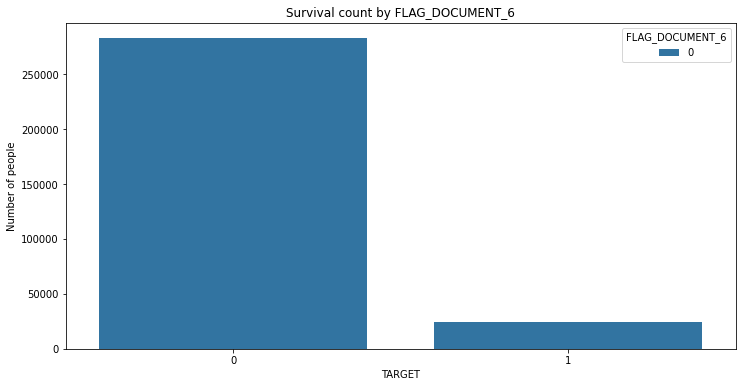

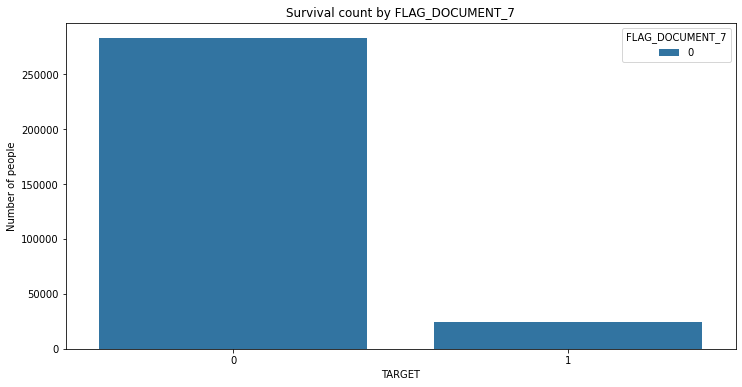

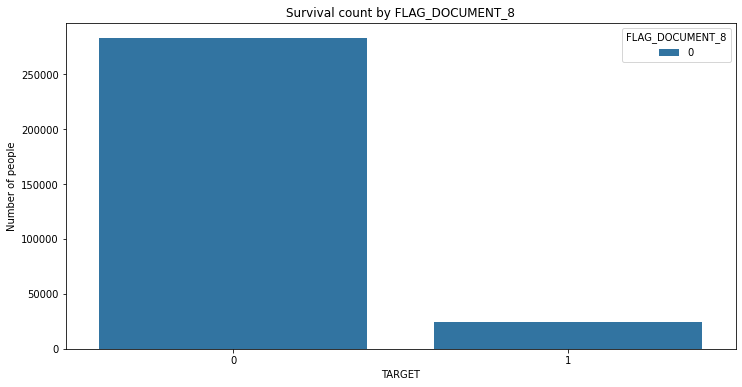

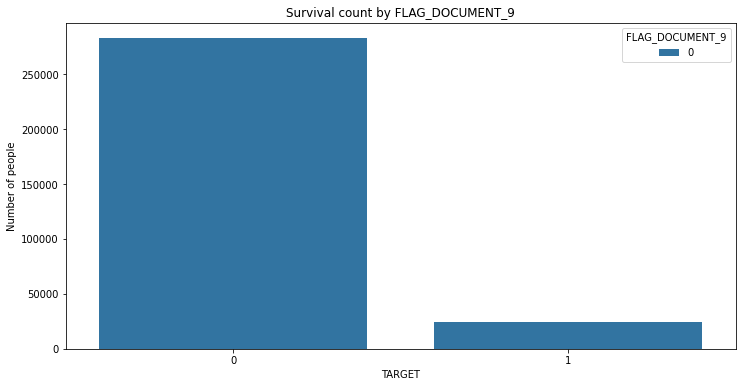

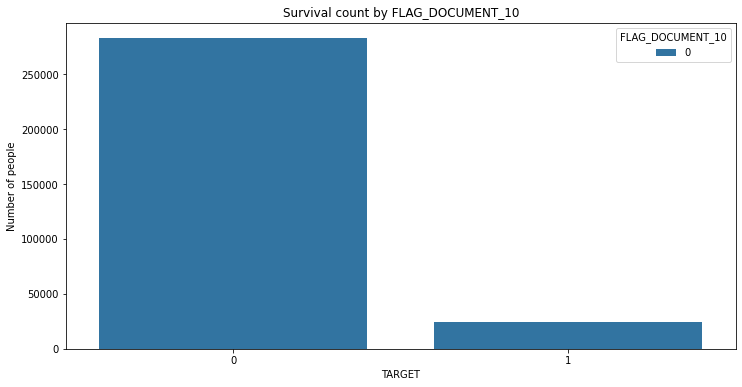

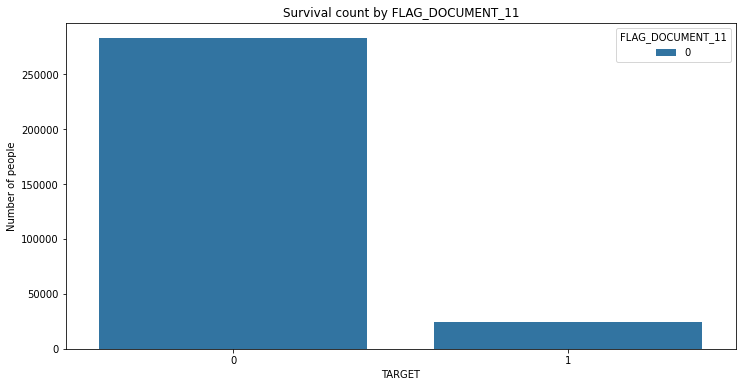

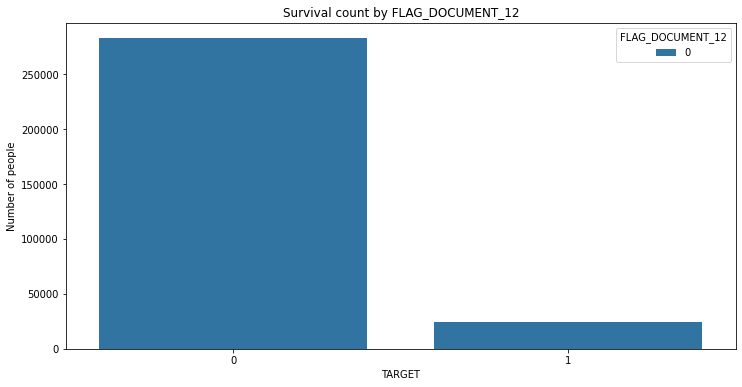

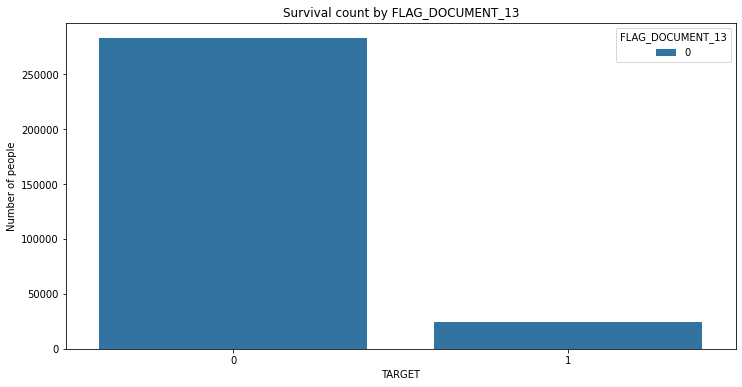

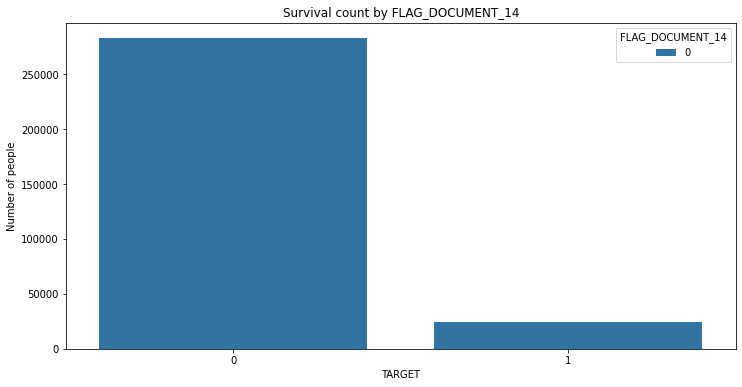

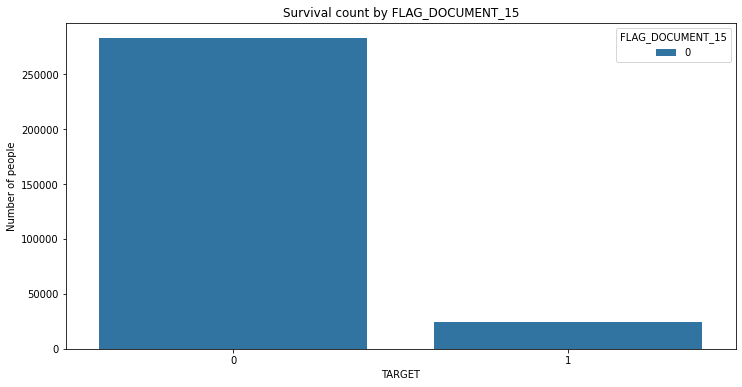

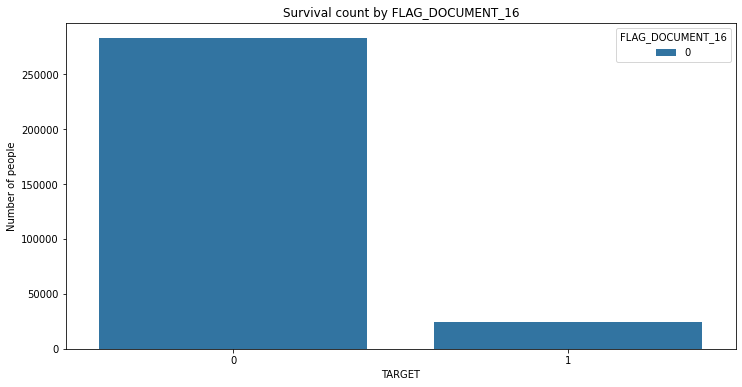

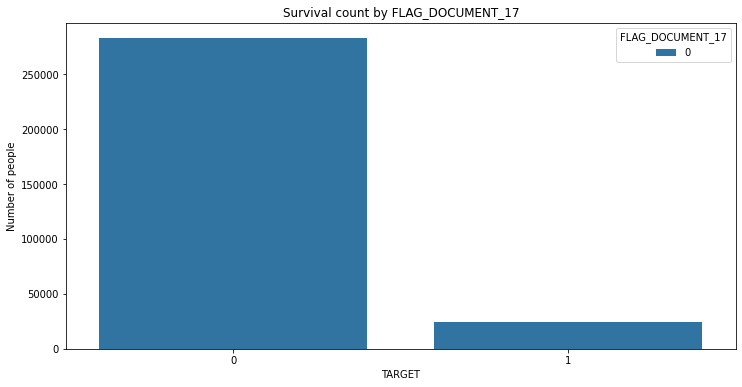

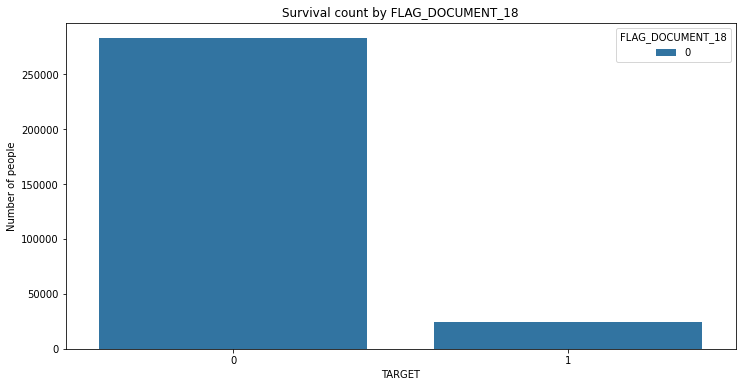

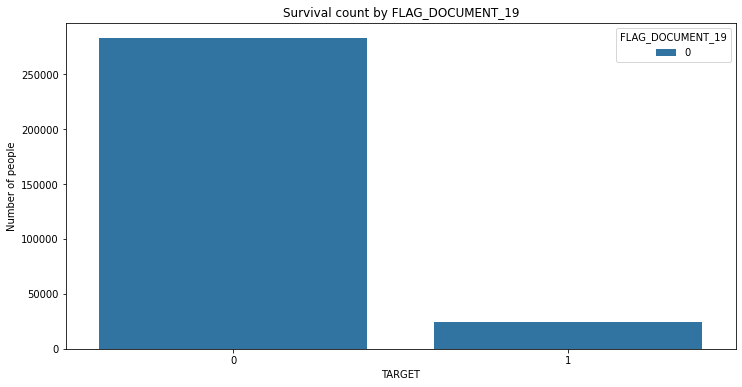

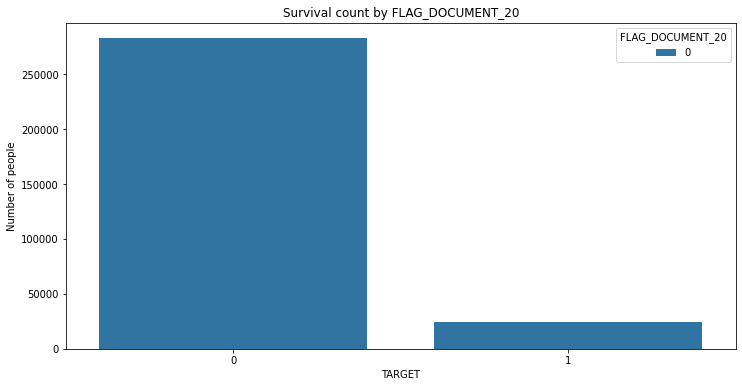

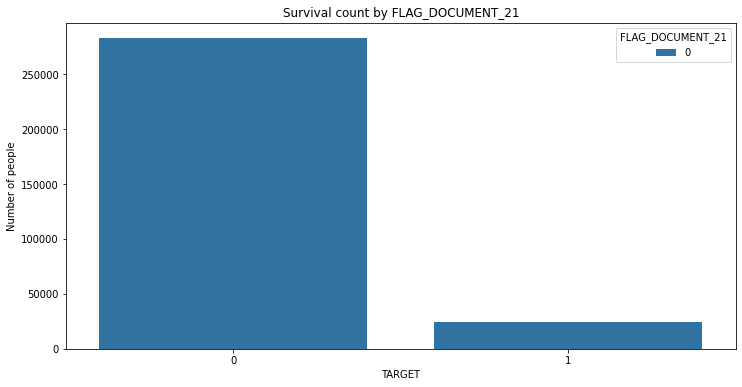

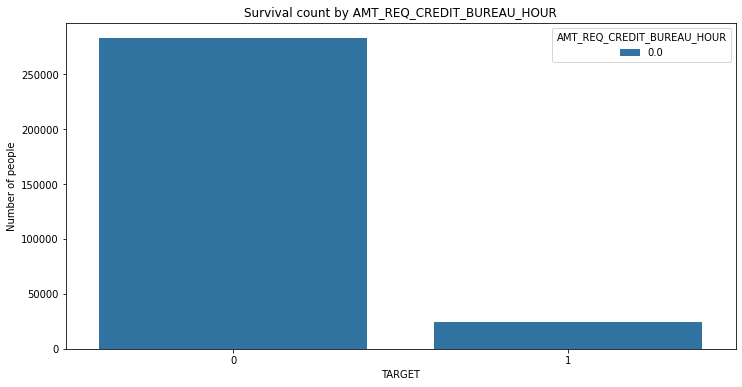

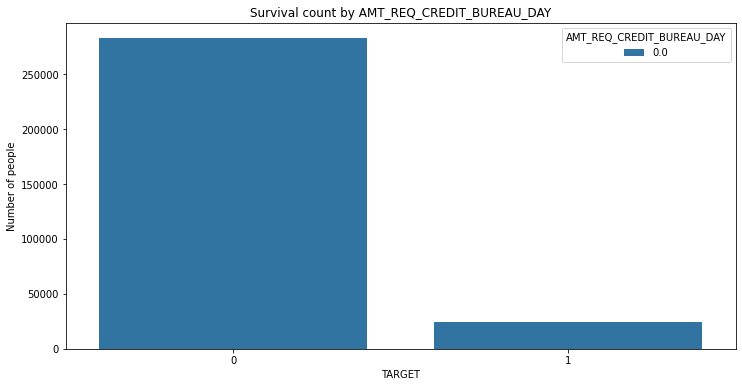

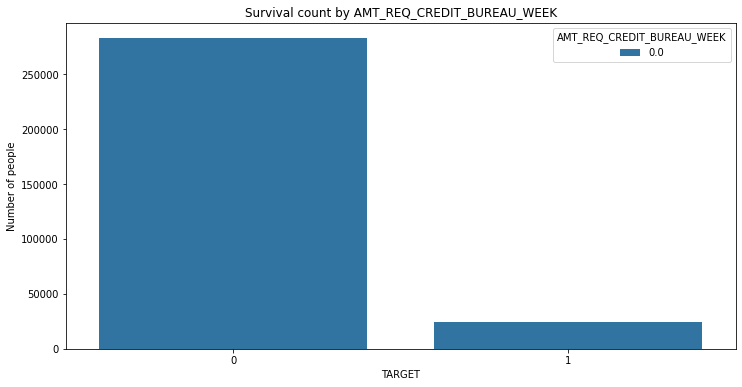

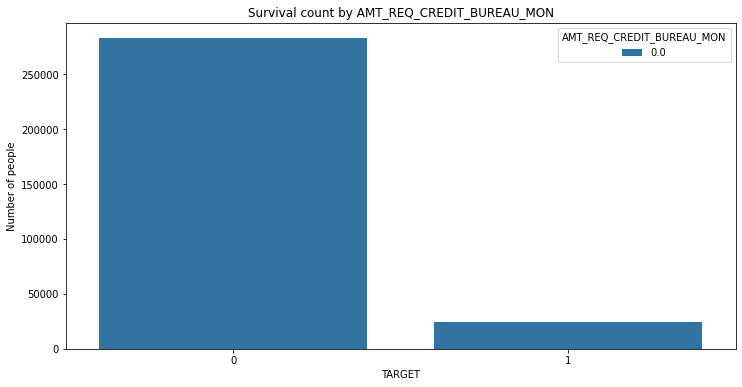

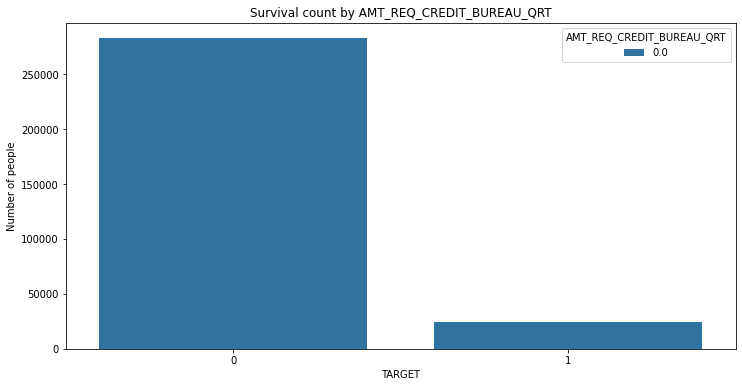

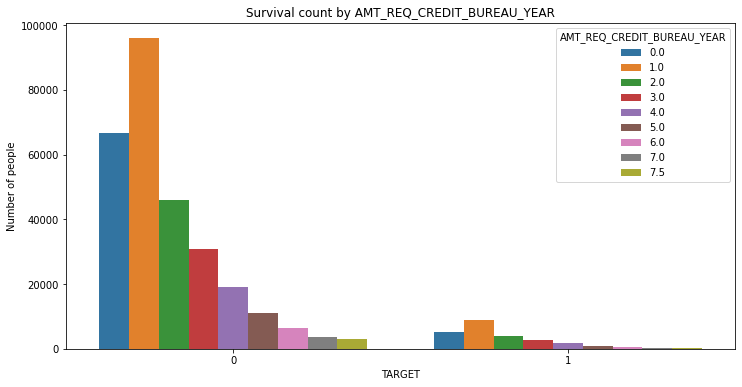

In [11]:

#############################################
# Visualization on numerical columns 
#############################################

def count_plot(d, y, x):
    plt.figure(figsize=(12,6))
    sns.countplot(x = d[y], hue = x, data=d)
    plt.ylabel('Number of people')
    plt.title('Survival count by '+ x)
    
over_column_name = list()

for i in num_cols:
    if (len(df_train[i].value_counts())<20):
        count_plot(df_train, target, i)
    elif (len(df_train[i].value_counts())>20):
        over_column_name.append(i)

print(over_column_name)




### pd.get_dummies()

A pandas function, which is used to convert categorical variables into dummy or indicator variables. It creates a new DataFrame with binary columns for each unique category in the specified column(s).


A pandas function to create new columns with binary values (0 or 1) for each unique category in the specified column(s). If a row has a particular category, the corresponding column value will be 1, and for other categories, it will be 0.

In [12]:
'''
For example:
pd.get_dummies(pd.Series(list('abc')), dtype=float)
     a    b    c
0  1.0  0.0  0.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
'''

print(df_train.shape)
print(df_test.shape)

display (df_train.head())
df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

print(df_train.shape)
print(df_test.shape)
display (df_train.head())

(307511, 122)
(48744, 121)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


(307511, 246)
(48744, 242)


,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,100002,1,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,...,0,0,0,0,0,0,1,0,1,0
1,100003,0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,...,0,1,0,0,0,0,0,0,1,0
2,100004,0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
####################################################
# After get_dummies on train and test dataset, 
# Let's ensure that train columns and test columns 
# are the same, except Target column in train dataset  
####################################################

test_col = []
delete_train = []

for i in df_test.columns:
    test_col.append(i)
for j in df_train.columns:
    if j not in test_col:
        delete_train.append(j)
delete_train.remove(target)

print(df_train.shape)
print(df_test.shape)

#-----------------

train_col = []
delete_test = []

for i in df_train.columns:
    train_col.append(i)
for j in df_test.columns:
    if j not in train_col:
        delete_test.append(j)

#-----------------
        
print(df_train.shape)
print(df_test.shape)

for delete in delete_train:
    df_train = df_train.drop([delete],axis=1)
    
for delete in delete_test:
    df_test = df_test.drop([delete],axis=1)
    
print(df_train.shape)
print(df_test.shape)



(307511, 246)
(48744, 242)
(307511, 246)
(48744, 242)
(307511, 243)
(48744, 242)


In [14]:
########################################################################
# LGBMClassifier do not support special JSON characters in feature name.
# e.g. 'ORGANIZATION_TYPE_Industry: type 1',
# hence, need to clean.
# https://teratail.com/questions/c2aqe5gbg1qcmv
########################################################################

import re
df2_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df2_test = df_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))


In [15]:
x_train = df2_train.drop(columns=["TARGET", "SK_ID_CURR"])
y_train = df2_train["TARGET"]


## Model Validation and Comparison

<!-- xx -->
<div> <img src="./image/ModelComparison.jpeg" alt="Drawing" style="width: 650px;"/></div>

<!-- https://stats.stackexchange.com/questions/49540/understanding-stratified-cross-validation  -->
### Cross Validation
Cross Validation: Splits the data into k "random" folds

<div> <img src="./image/CrossValidation.png" alt="Drawing" style="width: 450px;"/></div>

### Stratified Cross Validation  --> **This project use this!!**
Stratified Cross Valiadtion: Splits the data into k folds, making sure each fold is an appropriate representative of the original data. (class distribution, mean, variance, etc)


Stratified merit-based approach addresses imbalanced data by considering the relative importance or performance of different classes, ensuring proportional representation during sampling or modeling.
<div> <img src="./image/StratifiedCrossValidation.png" alt="Drawing" style="width: 600px;"/></div>

In [16]:
%%time

## Choose models, we want to compare
## TODO: Here are we are choosing 'default' models
## What if we choose the 'best of' for each model
## See 'hyper-1' notebook for how to get the best model :-) 

models = []
models.append(('LGB' , lgb.LGBMClassifier()))
models.append(('XGB' , xgb.XGBClassifier()))
models.append(('LR'  , LogisticRegression(max_iter=500)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF'  , RandomForestClassifier()))
models.append(('GB'  , GradientBoostingClassifier()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('SVM' , SVC()))

results1 = []
results2 = []
results3 = []
results4 = []

names = []
## for classification tasks
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
## for regression tasks
#scoring_metrics = ['r2', 'rmse']


#cat_cols = [col for col in x_tr.columns if x_tr[col].dtype not in ["float16","float32","float64", "int64", "int32"]]
#num_cols = [col for col in x_tr.columns if x_tr[col].dtype in ["float16","float32","float64", "int64", "int32"]]

#for i in cat_cols:
#    x_tr[i]=pd.factorize(x_tr[i])[0]
#    x_va[i]=pd.factorize(x_va[i])[0]
#    #total_df[[i]] = total_df[[i]].apply(lambda x: pd.factorize(x)[0])
    
    
    
X = x_train.copy()
y = np.ravel(y_train)
for name, model in models:
    print ('\n========= ', name , ' =========')

    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
    
    ## cv can be int or kfold
    cv_results = cross_validate(model, X, y, cv=kfold, scoring=scoring_metrics, n_jobs=-1)
    pprint (cv_results)
    # cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring_metric)
    this_result1 = cv_results['test_accuracy']
    this_result2 = cv_results['test_f1']
    this_result3 = cv_results['test_roc_auc']
    this_result4 = cv_results['fit_time']
        
    results1.append(this_result1)
    results2.append(this_result2)
    results3.append(this_result3)
    results4.append(this_result4)
    
    names.append(name)
    print("\n{}: accuracy : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result1), np.median(this_result1), np.std(this_result1), this_result1))
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result2), np.median(this_result2), np.std(this_result2), this_result2))
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result3), np.median(this_result3), np.std(this_result3), this_result3))
    print("\n{}: ROC AUC : avg={:,.2f}, median={:,.2f},  std={:,.2f},  cv_results={}".format (
        name, np.mean(this_result4), np.median(this_result4), np.std(this_result4), this_result4))


=========  LGB  =========
{'fit_time': array([ 9.88254023, 10.19798875, 10.09656525, 10.91975403, 10.03091931]),
 'score_time': array([0.85919142, 0.90886497, 0.88464403, 0.84769869, 0.89163733]),
 'test_accuracy': array([0.91935353, 0.91984001, 0.91922214, 0.91944977, 0.91936848]),
 'test_f1': array([0.02935421, 0.03861154, 0.02204724, 0.03128666, 0.03239024]),
 'test_precision': array([0.51724138, 0.60736196, 0.48695652, 0.53691275, 0.51875   ]),
 'test_recall': array([0.01510574, 0.01993958, 0.01127895, 0.01611279, 0.01671702]),
 'test_roc_auc': array([0.75421674, 0.75515135, 0.75844571, 0.75305689, 0.74993138])}

LGB: accuracy : avg=0.92, median=0.92,  std=0.00,  cv_results=[0.91935353 0.91984001 0.91922214 0.91944977 0.91936848]

LGB: ROC AUC : avg=0.03, median=0.03,  std=0.01,  cv_results=[0.02935421 0.03861154 0.02204724 0.03128666 0.03239024]

LGB: ROC AUC : avg=0.75, median=0.75,  std=0.00,  cv_results=[0.75421674 0.75515135 0.75844571 0.75305689 0.74993138]

LGB: ROC AUC : a

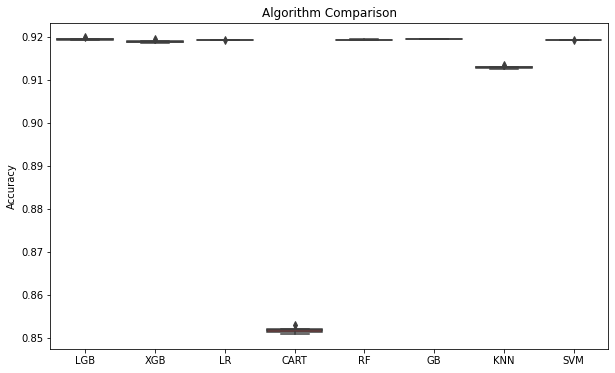

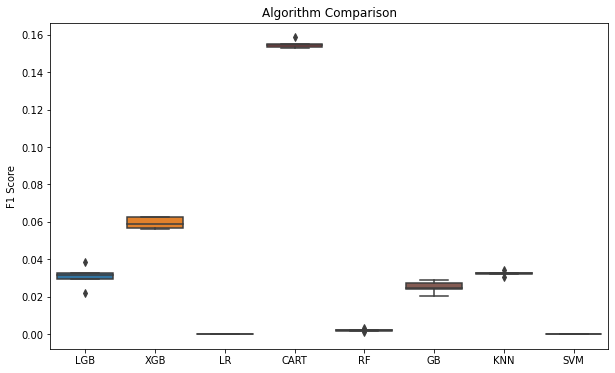

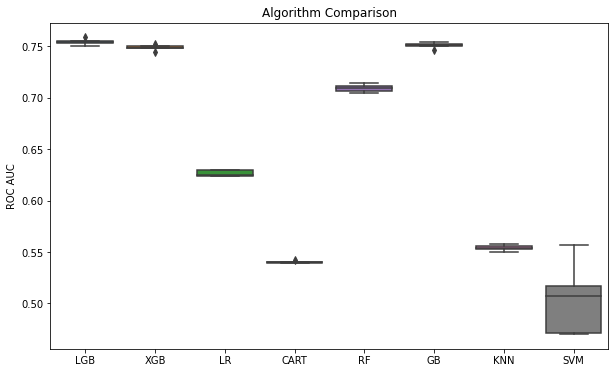

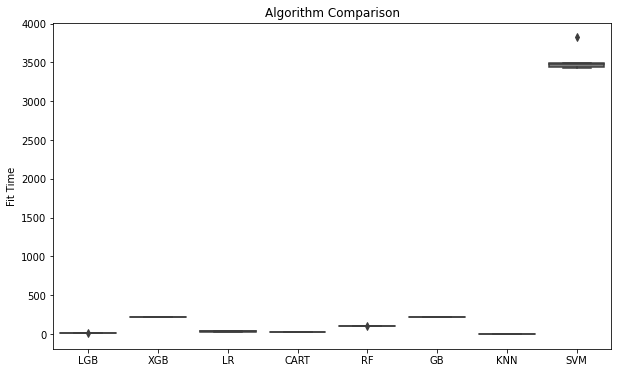

In [17]:
plt.figure(figsize = (10,6))
# boxplot algorithm comparison
ax = sns.boxplot(data=results1)
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('Accuracy')
plt.show()

plt.figure(figsize = (10,6))
# boxplot algorithm comparison
ax = sns.boxplot(data=results2) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('F1 Score')
plt.show()

plt.figure(figsize = (10,6))
# boxplot algorithm comparison
ax = sns.boxplot(data=results3) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('ROC AUC')
plt.show()

plt.figure(figsize = (10,6))
# boxplot algorithm comparison
ax = sns.boxplot(data=results4) 
ax.set_title('Algorithm Comparison')
ax.set_xticklabels(names)
ax.set_ylabel('Fit Time')
plt.show()

In [18]:
##########################################################################
# Reference:
# https://www.kaggle.com/code/hadeux/auto-simple-ensemble-model/notebook
# https://github.com/elephantscale/machine-learning-workshop/blob/main/cross-validation/cv-3-multiple-algos.ipynb
##########################################################################